In [1]:
import pandas as pd
import polars as pl

In [2]:
df = pd.read_excel("../data/new_l2.xlsx")

In [3]:
df.describe()

,Công lập (1/0),Điểm chuẩn,Học phí,điểm quy đổi,hk10,hk11,hk12,hl10,hl11,hl12,nhom_nganh
count,13274.000000,13274.000000,1.327400e+04,13274.000000,13274.000000,13274.000000,13274.000000,13274.0,13274.000000,13274.000000,13274.000000
mean,0.820476,100.521107,3.306245e+07,0.095487,0.002712,0.002712,0.002712,0.0,0.035257,0.208716,730.568178
std,0.387517,208.529014,3.584788e+07,0.341808,0.073602,0.073602,0.073602,0.0,0.477435,1.085441,80.040881
min,0.000000,-1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-1.000000
25%,1.000000,15.000000,1.760000e+07,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,731.000000
50%,1.000000,20.000000,2.800000e+07,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,738.000000
75%,1.000000,25.880000,4.357500e+07,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,752.000000
max,3.000000,1500.000000,4.676000e+08,2.000000,2.000000,2.000000,2.000000,0.0,6.500000,8.000000,844.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13274 entries, 0 to 13273
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Công lập (1/0)  13274 non-null  int64  
 1   Tỉnh/TP         13274 non-null  object 
 2   Tổ hợp môn      13274 non-null  object 
 3   Điểm chuẩn      13274 non-null  float64
 4   Học phí         13274 non-null  int64  
 5   tên ccta        13274 non-null  object 
 6   điểm ccta       13274 non-null  object 
 7   điểm quy đổi    13274 non-null  float64
 8   hk10            13274 non-null  int64  
 9   hk11            13274 non-null  int64  
 10  hk12            13274 non-null  int64  
 11  hl10            13274 non-null  int64  
 12  hl11            13274 non-null  float64
 13  hl12            13274 non-null  float64
 14  nhom_nganh      13274 non-null  int64  
 15  ma_xet_tuyen    13274 non-null  object 
dtypes: float64(4), int64(7), object(5)
memory usage: 1.6+ MB


In [5]:
df = df.rename(columns={
    "Công lập (1/0)": "cong_lap",
    "Tỉnh/TP": "tinh_tp",
    "Tổ hợp môn": "to_hop_mon",
    "Điểm chuẩn": "diem_chuan",
    "Học phí": "hoc_phi",
    "tên ccta": "ten_ccta",
    "điểm ccta": "diem_ccta",
    "điểm quy đổi": "diem_quy_doi",
})

In [6]:
df["ten_ccta"].value_counts()

ten_ccta
0       11642
CEFR     1409
JLPT      202
0          21
Name: count, dtype: int64

In [7]:
col = df.columns.tolist()

for i in col:
    if df[i].dtype == "object":
        df[i] = df[i].astype("string")


In [8]:
print(df["cong_lap"].value_counts())
print(df["tinh_tp"].value_counts())
print(df["diem_chuan"].value_counts())
print(df["diem_quy_doi"].value_counts())
print(df["to_hop_mon"].value_counts())

cong_lap
1    10865
0     2398
2        7
3        4
Name: count, dtype: int64
tinh_tp
TP. Hồ Chí Minh    5935
TP. HCM            3099
Cần Thơ            1042
Vĩnh Long           593
Bình Dương          470
Đồng Nai            464
Vũng Tàu            340
Trà Vinh            325
Đồng Tháp           216
Kiên Giang          208
An Giang            185
Bạc Liêu            157
Long An             103
Tiền Giang           82
Hậu Giang            48
Đà Lạt                7
Name: count, dtype: Int64
diem_chuan
15.0     2412
16.0      991
19.0      465
17.0      432
18.0      378
         ... 
906.0       1
655.0       1
673.0       1
943.0       1
683.0       1
Name: count, Length: 572, dtype: int64
diem_quy_doi
0.0    12227
1.0      753
1.5      147
2.0      147
Name: count, dtype: int64
to_hop_mon
D01                          1826
A00                          1782
A01                          1744
VNUHCM                       1294
D07                           648
                           

In [9]:
print(df["hk10"].value_counts())
print(df["hk11"].value_counts())
print(df["hk12"].value_counts())
print(df["hl10"].value_counts())
print(df["hl11"].value_counts())
print(df["hl12"].value_counts())

hk10
0    13256
2       18
Name: count, dtype: int64
hk11
0    13256
2       18
Name: count, dtype: int64
hk12
0    13256
2       18
Name: count, dtype: int64
hl10
0    13274
Name: count, dtype: int64
hl11
0.0    13202
6.5       72
Name: count, dtype: int64
hl12
0.0    12624
1.0      181
6.5      145
5.0      123
2.0       87
8.0       60
7.0       54
Name: count, dtype: int64


In [10]:
df["hl11"] = df["hl11"].apply(lambda x: 2 if x == 6.5 else 0)

In [11]:
candidate_list = df.copy()

In [12]:
student_profile = df.copy()

In [13]:
import random
import pandas as pd

def generate_simple_synthetic(student_profile: pd.DataFrame, n_synthetic=5) -> pd.DataFrame:
    thpt_incs = [random.uniform(0.1, 5) for _ in range(10)]
    vsat_incs = [random.uniform(1, 100) for _ in range(10)]
    dgnl_incs = [random.uniform(1, 300) for _ in range(10)]
    hocba_incs = [random.uniform(0.1, 5) for _ in range(10)]

    cefr_levels = ["A1", "A2", "B1", "B2", "C1", "C2"]
    jlpt_levels = ["N1", "N2", "N3", "N4", "N5"]

    rows = []
    for _, row in student_profile.iterrows():
        code = str(row['ma_xet_tuyen'])

        # Dòng gốc
        origin = row.copy()
        origin['synthetic'] = 'origin'
        rows.append(origin)

        for _ in range(n_synthetic):
            new_row = row.copy()

            # diem_chuan logic cộng/trừ như cũ
            val = row['diem_chuan']
            if val == -1:
                new_val = -1
            else:
                if "THPT" in code:
                    inc_list, limit = thpt_incs, 30
                elif "VSAT" in code:
                    inc_list, limit = vsat_incs, 450
                elif "ĐGNL" in code:
                    inc_list, limit = dgnl_incs, 1200
                elif "HocBa" in code:
                    inc_list, limit = hocba_incs, 30
                else:
                    inc_list, limit = [], None

                if not inc_list:
                    new_val = val
                else:
                    inc = random.choice(inc_list)
                    sign = random.choice([-1, 1])
                    candidate = val + sign * inc
                    if limit and (candidate > limit or candidate < 0):
                        sign *= -1
                        candidate = val + sign * inc
                        if limit and (candidate > limit or candidate < 0):
                            candidate = val
                    new_val = candidate
            new_row['diem_chuan'] = new_val

            # hoc_phi
            fee_val = row['hoc_phi']
            delta = random.randint(10000000, 30000000)
            sign = random.choice([-1, 1])
            fee_candidate = fee_val + sign * delta
            if fee_candidate < 0:
                fee_candidate = 0
            new_row['hoc_phi'] = fee_candidate

            # ten_ccta & diem_ccta
            ten_ccta = random.choice(["CEFR", "JLPT", "0"])
            if ten_ccta == "CEFR":
                diem_ccta = random.choice(cefr_levels)
            elif ten_ccta == "JLPT":
                diem_ccta = random.choice(jlpt_levels)
            else:
                diem_ccta = "0"
            new_row['ten_ccta'] = ten_ccta
            new_row['diem_ccta'] = diem_ccta

            # Điểm thành phần: random theo xác suất (1,2 nhiều hơn)
            for col in ['hl10', 'hl11', 'hk12', 'hk10', 'hk11']:
                new_row[col] = random.choices([1, 2, 3, 4], weights=[0.4, 0.4, 0.1, 0.1])[0]
            # 'hl12' (4, 5 ít hơn)
            new_row['hl12'] = random.choices([1, 2, 3, 4, 5], weights=[0.3, 0.3, 0.3, 0.05, 0.05])[0]

            new_row['synthetic'] = 'synthetic'
            rows.append(new_row)

    return pd.DataFrame(rows)

In [14]:
student_profile_synthetic = generate_simple_synthetic(student_profile, n_synthetic=5)

In [15]:
student_profile_synthetic = student_profile_synthetic.drop(columns=["ma_xet_tuyen", "synthetic"])

bins = [0, 5_000_000, 10_000_000, 20_000_000, 40_000_000, 60_000_000, 80_000_000, 100_000_000, float('inf')]
labels = ["0-5M", "5M-10M", "10M-20M", "20M-40M", "40M-60M", "60M-80M", "80M-100M", "Above 100M"]
student_profile_synthetic['hoc_phi'] = pd.cut(student_profile_synthetic['hoc_phi'], bins=bins, labels=labels, right=False)

In [16]:
candidate_list['hoc_phi'] = pd.cut(candidate_list['hoc_phi'], bins=bins, labels=labels, right=False)

In [17]:
student_profile_synthetic

,cong_lap,tinh_tp,to_hop_mon,diem_chuan,hoc_phi,ten_ccta,diem_ccta,diem_quy_doi,hk10,hk11,hk12,hl10,hl11,hl12,nhom_nganh
0,1,An Giang,VNUHCM,617.000000,10M-20M,0,0,0.0,0,0,0,0,0,0.0,714
0,1,An Giang,VNUHCM,715.597514,0-5M,0,0,0.0,1,2,2,1,2,3.0,714
0,1,An Giang,VNUHCM,605.498687,20M-40M,CEFR,B2,0.0,1,2,1,2,2,1.0,714
0,1,An Giang,VNUHCM,865.221610,20M-40M,CEFR,A2,0.0,2,3,2,2,2,1.0,714
0,1,An Giang,VNUHCM,702.359347,0-5M,CEFR,B2,0.0,1,2,3,3,1,1.0,714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13273,1,TP. Hồ Chí Minh,D15,25.844213,20M-40M,0,0,0.0,4,1,1,2,1,1.0,722
13273,1,TP. Hồ Chí Minh,D15,25.175831,0-5M,0,0,0.0,1,3,2,1,1,2.0,722
13273,1,TP. Hồ Chí Minh,D15,21.739817,0-5M,CEFR,A2,0.0,1,2,1,2,3,2.0,722
13273,1,TP. Hồ Chí Minh,D15,21.067597,0-5M,0,0,0.0,1,4,2,1,2,2.0,722


In [18]:
student_profile_synthetic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79644 entries, 0 to 13273
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   cong_lap      79644 non-null  int64   
 1   tinh_tp       79644 non-null  object  
 2   to_hop_mon    79644 non-null  object  
 3   diem_chuan    79644 non-null  float64 
 4   hoc_phi       79644 non-null  category
 5   ten_ccta      79644 non-null  object  
 6   diem_ccta     79644 non-null  object  
 7   diem_quy_doi  79644 non-null  float64 
 8   hk10          79644 non-null  int64   
 9   hk11          79644 non-null  int64   
 10  hk12          79644 non-null  int64   
 11  hl10          79644 non-null  int64   
 12  hl11          79644 non-null  int64   
 13  hl12          79644 non-null  float64 
 14  nhom_nganh    79644 non-null  int64   
dtypes: category(1), float64(3), int64(7), object(4)
memory usage: 9.2+ MB


In [19]:
from tqdm import tqdm
import random

def filter_candidates_per_student(student_profile_synthetic: pl.DataFrame, candidate_list: pl.DataFrame, neg_pos_ratio=3):
    rows = []
    stu_cols = [col for col in student_profile_synthetic.columns if col != 'student_id']
    cand_cols = candidate_list.columns

    stu_rows = student_profile_synthetic.to_dicts()
    candidate_rows = candidate_list.to_dicts()

    for stu in tqdm(stu_rows, desc="Processing students"):
        # Lọc cứng (==)
        candidates = [cand for cand in candidate_rows if
            (stu['tinh_tp'] == cand['tinh_tp']) and
            (stu['to_hop_mon'] == cand['to_hop_mon']) and
            (stu['cong_lap'] == cand['cong_lap']) and
            (stu['nhom_nganh'] == cand['nhom_nganh']) and
            (stu['hoc_phi'] == cand['hoc_phi'])
        ]
        suitable = []
        not_suitable = []
        # Kiểm tra điều kiện mềm
        for cand in candidates:
            is_match = (
                (stu['diem_chuan'] >= cand['diem_chuan']) and
                (stu['hk10'] <= cand['hk10']) and
                (stu['hl10'] <= cand['hl10']) and
                (stu['hl11'] <= cand['hl11']) and
                (stu['hl12'] <= cand['hl12']) and
                (stu['hk11'] <= cand['hk11']) and
                (stu['hk12'] <= cand['hk12'])
            )
            row = {
                **{f'student_{col}': stu[col] for col in stu_cols},
                **{f'cand_{col}': cand[col] for col in cand_cols},
                'label': int(is_match)
            }
            if is_match:
                suitable.append(row)
            else:
                not_suitable.append(row)
        # Lưu positive
        rows.extend(suitable)
        # Lưu negative
        if not_suitable :
            rows.extend(not_suitable)

    train_df = pl.DataFrame(rows)
    return train_df

In [20]:
student_profile_synthetic_pl = pl.from_pandas(student_profile_synthetic)
candidate_list_pl = pl.from_pandas(candidate_list)

In [21]:
student_profile_synthetic_pl

cong_lap,tinh_tp,to_hop_mon,diem_chuan,hoc_phi,ten_ccta,diem_ccta,diem_quy_doi,hk10,hk11,hk12,hl10,hl11,hl12,nhom_nganh
i64,str,str,f64,cat,str,str,f64,i64,i64,i64,i64,i64,f64,i64
1,"""An Giang""","""VNUHCM""",617.0,"""10M-20M""","""0""","""0""",0.0,0,0,0,0,0,0.0,714
1,"""An Giang""","""VNUHCM""",715.597514,"""0-5M""","""0""","""0""",0.0,1,2,2,1,2,3.0,714
1,"""An Giang""","""VNUHCM""",605.498687,"""20M-40M""","""CEFR""","""B2""",0.0,1,2,1,2,2,1.0,714
1,"""An Giang""","""VNUHCM""",865.22161,"""20M-40M""","""CEFR""","""A2""",0.0,2,3,2,2,2,1.0,714
1,"""An Giang""","""VNUHCM""",702.359347,"""0-5M""","""CEFR""","""B2""",0.0,1,2,3,3,1,1.0,714
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1,"""TP. Hồ Chí Minh""","""D15""",25.844213,"""20M-40M""","""0""","""0""",0.0,4,1,1,2,1,1.0,722
1,"""TP. Hồ Chí Minh""","""D15""",25.175831,"""0-5M""","""0""","""0""",0.0,1,3,2,1,1,2.0,722
1,"""TP. Hồ Chí Minh""","""D15""",21.739817,"""0-5M""","""CEFR""","""A2""",0.0,1,2,1,2,3,2.0,722


In [22]:
candidate_list_pl

cong_lap,tinh_tp,to_hop_mon,diem_chuan,hoc_phi,ten_ccta,diem_ccta,diem_quy_doi,hk10,hk11,hk12,hl10,hl11,hl12,nhom_nganh,ma_xet_tuyen
i64,str,str,f64,cat,str,str,f64,i64,i64,i64,i64,i64,f64,i64,str
1,"""An Giang""","""VNUHCM""",617.0,"""10M-20M""","""0""","""0""",0.0,0,0,0,0,0,0.0,714,"""QSA7140201ĐGNL"""
1,"""An Giang""","""VNUHCM""",635.0,"""10M-20M""","""0""","""0""",0.0,0,0,0,0,0,0.0,714,"""QSA7140205ĐGNL"""
1,"""An Giang""","""VNUHCM""",614.0,"""10M-20M""","""0""","""0""",0.0,0,0,0,0,0,0.0,714,"""QSA7140202ĐGNL"""
1,"""An Giang""","""VNUHCM""",831.0,"""10M-20M""","""0""","""0""",0.0,0,0,0,0,0,0.0,714,"""QSA7140209ĐGNL"""
1,"""An Giang""","""VNUHCM""",688.0,"""10M-20M""","""0""","""0""",0.0,0,0,0,0,0,0.0,714,"""QSA7140211ĐGNL"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1,"""TP. Hồ Chí Minh""","""D15""",27.85,"""10M-20M""","""0""","""0""",0.0,0,0,0,0,0,0.0,722,"""VHS7229040THPTQG"""
1,"""TP. Hồ Chí Minh""","""C00""",25.5,"""10M-20M""","""0""","""0""",0.0,0,0,0,0,0,0.0,722,"""VHS7229040THPTQG"""
1,"""TP. Hồ Chí Minh""","""D01""",25.5,"""10M-20M""","""0""","""0""",0.0,0,0,0,0,0,0.0,722,"""VHS7229040THPTQG"""


In [23]:
candidate_list_pl = candidate_list_pl.with_columns(
    pl.col("hl12").replace(pl.lit(0), pl.lit(10)),
    pl.col("hl11").replace(pl.lit(0), pl.lit(10)),
    pl.col("hl10").replace(pl.lit(0), pl.lit(10)),
    pl.col("hk12").replace(pl.lit(0), pl.lit(10)),
    pl.col("hk11").replace(pl.lit(0), pl.lit(10)),
    pl.col("hk10").replace(pl.lit(0), pl.lit(10))
)

In [24]:
train_df = filter_candidates_per_student(student_profile_synthetic_pl, candidate_list_pl)

Processing students: 100%|██████████| 79644/79644 [00:52<00:00, 1518.70it/s]


In [25]:
train_df.describe()

statistic,student_cong_lap,student_tinh_tp,student_to_hop_mon,student_diem_chuan,student_hoc_phi,student_ten_ccta,student_diem_ccta,student_diem_quy_doi,student_hk10,student_hk11,student_hk12,student_hl10,student_hl11,student_hl12,student_nhom_nganh,cand_cong_lap,cand_tinh_tp,cand_to_hop_mon,cand_diem_chuan,cand_hoc_phi,cand_ten_ccta,cand_diem_ccta,cand_diem_quy_doi,cand_hk10,cand_hk11,cand_hk12,cand_hl10,cand_hl11,cand_hl12,cand_nhom_nganh,cand_ma_xet_tuyen,label
str,f64,str,str,f64,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,str,f64
"""count""",518399.0,"""518399""","""518399""",518399.0,"""518399""","""518399""","""518399""",518399.0,518399.0,518399.0,518399.0,518399.0,518399.0,518399.0,518399.0,518399.0,"""518399""","""518399""",518399.0,"""518399""","""518399""","""518399""",518399.0,518399.0,518399.0,518399.0,518399.0,518399.0,518399.0,518399.0,"""518399""",518399.0
"""null_count""",0.0,"""0""","""0""",0.0,"""0""","""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""","""0""",0.0,"""0""","""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""",0.0
"""mean""",0.930368,null,null,115.651053,null,null,null,0.114188,1.249707,1.236281,1.239638,1.236659,1.253334,1.516494,734.405259,0.930368,null,null,117.928001,null,null,null,0.113001,9.999167,9.999167,9.999167,10.0,9.811929,9.835378,734.405259,null,0.519206
"""std""",0.254866,null,null,222.741143,null,null,null,0.33882,1.192141,1.18171,1.182457,1.180901,1.185147,1.45758,37.127651,0.254866,null,null,220.594927,null,null,null,0.335713,0.081646,0.081646,0.081646,0.0,1.212107,0.911786,37.127651,null,0.499631
"""min""",0.0,"""An Giang""","""A00""",-1.0,"""0-5M""","""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,"""An Giang""","""A00""",-1.0,"""0-5M""","""0""","""0""",0.0,2.0,2.0,2.0,10.0,2.0,1.0,-1.0,"""BVU7220201C1THPTQG""",0.0
"""25%""",1.0,null,null,18.155787,null,null,null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,732.0,1.0,null,null,18.0,null,null,null,0.0,10.0,10.0,10.0,10.0,10.0,10.0,732.0,null,0.0
"""50%""",1.0,null,null,23.25,null,null,null,0.0,1.0,1.0,1.0,1.0,1.0,1.0,734.0,1.0,null,null,24.1,null,null,null,0.0,10.0,10.0,10.0,10.0,10.0,10.0,734.0,null,1.0
"""75%""",1.0,null,null,27.67,null,null,null,0.0,2.0,2.0,2.0,2.0,2.0,3.0,738.0,1.0,null,null,26.96,null,null,null,0.0,10.0,10.0,10.0,10.0,10.0,10.0,738.0,null,1.0
"""max""",3.0,"""Đồng Tháp""","""X10""",1500.0,"""Above 100M""","""JLPT""","""N5""",2.0,4.0,4.0,4.0,4.0,4.0,8.0,844.0,3.0,"""Đồng Tháp""","""X10""",1500.0,"""Above 100M""","""JLPT""","""N3""",2.0,10.0,10.0,10.0,10.0,10.0,10.0,844.0,"""YDS7720701THPTQG""",1.0


In [26]:
train_df.filter(pl.col("label") == 0)

student_cong_lap,student_tinh_tp,student_to_hop_mon,student_diem_chuan,student_hoc_phi,student_ten_ccta,student_diem_ccta,student_diem_quy_doi,student_hk10,student_hk11,student_hk12,student_hl10,student_hl11,student_hl12,student_nhom_nganh,cand_cong_lap,cand_tinh_tp,cand_to_hop_mon,cand_diem_chuan,cand_hoc_phi,cand_ten_ccta,cand_diem_ccta,cand_diem_quy_doi,cand_hk10,cand_hk11,cand_hk12,cand_hl10,cand_hl11,cand_hl12,cand_nhom_nganh,cand_ma_xet_tuyen,label
i64,str,str,f64,str,str,str,f64,i64,i64,i64,i64,i64,f64,i64,i64,str,str,f64,str,str,str,f64,i64,i64,i64,i64,i64,f64,i64,str,i64
1,"""An Giang""","""VNUHCM""",617.0,"""10M-20M""","""0""","""0""",0.0,0,0,0,0,0,0.0,714,1,"""An Giang""","""VNUHCM""",635.0,"""10M-20M""","""0""","""0""",0.0,10,10,10,10,10,10.0,714,"""QSA7140205ĐGNL""",0
1,"""An Giang""","""VNUHCM""",617.0,"""10M-20M""","""0""","""0""",0.0,0,0,0,0,0,0.0,714,1,"""An Giang""","""VNUHCM""",831.0,"""10M-20M""","""0""","""0""",0.0,10,10,10,10,10,10.0,714,"""QSA7140209ĐGNL""",0
1,"""An Giang""","""VNUHCM""",617.0,"""10M-20M""","""0""","""0""",0.0,0,0,0,0,0,0.0,714,1,"""An Giang""","""VNUHCM""",688.0,"""10M-20M""","""0""","""0""",0.0,10,10,10,10,10,10.0,714,"""QSA7140211ĐGNL""",0
1,"""An Giang""","""VNUHCM""",617.0,"""10M-20M""","""0""","""0""",0.0,0,0,0,0,0,0.0,714,1,"""An Giang""","""VNUHCM""",717.0,"""10M-20M""","""0""","""0""",0.0,10,10,10,10,10,10.0,714,"""QSA7140212ĐGNL""",0
1,"""An Giang""","""VNUHCM""",617.0,"""10M-20M""","""0""","""0""",0.0,0,0,0,0,0,0.0,714,1,"""An Giang""","""VNUHCM""",636.0,"""10M-20M""","""0""","""0""",0.0,10,10,10,10,10,10.0,714,"""QSA7140217ĐGNL""",0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1,"""TP. Hồ Chí Minh""","""D15""",25.5,"""10M-20M""","""0""","""0""",0.0,0,0,0,0,0,0.0,722,1,"""TP. Hồ Chí Minh""","""D15""",27.25,"""10M-20M""","""0""","""0""",0.0,10,10,10,10,10,10.0,722,"""VHS7229042THPTQG""",0
1,"""TP. Hồ Chí Minh""","""D15""",25.5,"""10M-20M""","""0""","""0""",0.0,0,0,0,0,0,0.0,722,1,"""TP. Hồ Chí Minh""","""D15""",26.3,"""10M-20M""","""0""","""0""",0.0,10,10,10,10,10,10.0,722,"""VHS7229040THPTQG""",0
1,"""TP. Hồ Chí Minh""","""D15""",25.5,"""10M-20M""","""0""","""0""",0.0,0,0,0,0,0,0.0,722,1,"""TP. Hồ Chí Minh""","""D15""",27.85,"""10M-20M""","""0""","""0""",0.0,10,10,10,10,10,10.0,722,"""VHS7229040THPTQG""",0


In [27]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

cat_cols = [
    'student_cong_lap', 'student_tinh_tp', 'student_to_hop_mon', 'student_nhom_nganh', 'student_hoc_phi',
    'cand_cong_lap', 'cand_tinh_tp', 'cand_to_hop_mon', 'cand_nhom_nganh', 'cand_hoc_phi', 'cand_ma_xet_tuyen'
]

num_cols = [
    'student_diem_chuan', 'student_hk10', 'student_hk11', 'student_hk12', 'student_hl10', 'student_hl11', 'student_hl12',
    'cand_diem_chuan', 'cand_hk10', 'cand_hk11', 'cand_hk12', 'cand_hl10', 'cand_hl11', 'cand_hl12'
]

## LabelEncoder for categories

In [28]:
# Convert polars DataFrame to pandas DataFrame for sklearn preprocessing
train_df_pd = train_df.to_pandas()

encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    train_df_pd[col] = le.fit_transform(train_df_pd[col].astype(str))
    encoders[col] = le

scaler = StandardScaler()
train_df_pd[num_cols] = scaler.fit_transform(train_df_pd[num_cols])


In [29]:
train_df_pd

,student_cong_lap,student_tinh_tp,student_to_hop_mon,student_diem_chuan,student_hoc_phi,student_ten_ccta,student_diem_ccta,student_diem_quy_doi,student_hk10,student_hk11,...,cand_diem_quy_doi,cand_hk10,cand_hk11,cand_hk12,cand_hl10,cand_hl11,cand_hl12,cand_nhom_nganh,cand_ma_xet_tuyen,label
0,1,0,162,2.250816,1,0,0,0.0,-1.048289,-1.046181,...,0.0,0.010207,0.010207,0.010207,0.0,0.155161,0.180549,16,2263,1
1,1,0,162,2.250816,1,0,0,0.0,-1.048289,-1.046181,...,0.0,0.010207,0.010207,0.010207,0.0,0.155161,0.180549,16,2265,1
2,1,0,162,2.250816,1,0,0,0.0,-1.048289,-1.046181,...,0.0,0.010207,0.010207,0.010207,0.0,0.155161,0.180549,16,2267,0
3,1,0,162,2.250816,1,0,0,0.0,-1.048289,-1.046181,...,0.0,0.010207,0.010207,0.010207,0.0,0.155161,0.180549,16,2269,0
4,1,0,162,2.250816,1,0,0,0.0,-1.048289,-1.046181,...,0.0,0.010207,0.010207,0.010207,0.0,0.155161,0.180549,16,2271,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518394,1,8,51,-0.424634,0,0,0,0.0,-0.209461,2.338748,...,0.0,0.010207,0.010207,0.010207,0.0,0.155161,0.180549,18,3280,1
518395,1,8,51,-0.398292,2,0,0,0.0,0.629366,-0.199949,...,0.0,0.010207,0.010207,0.010207,0.0,0.155161,0.180549,18,1456,1
518396,1,8,51,-0.398292,2,0,0,0.0,0.629366,-0.199949,...,0.0,0.010207,0.010207,0.010207,0.0,0.155161,0.180549,18,1544,1
518397,1,8,51,-0.398292,2,0,0,0.0,0.629366,-0.199949,...,0.0,0.010207,0.010207,0.010207,0.0,0.155161,0.180549,18,1987,1


In [30]:
import tensorflow as tf
print(tf.__version__)


2.19.0


In [31]:
from tensorflow import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential
from tqdm.keras import TqdmCallback

X = train_df_pd[cat_cols + num_cols].values
y = train_df_pd['label'].values

model = Sequential([
    Dense(128, activation='relu', input_shape=(X.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])
model.fit(
    X, y,
    epochs=20,
    batch_size=128,
    callbacks=[TqdmCallback(verbose=1)]
)

/opt/miniconda3/envs/eda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/miniconda3/envs/eda/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
  0%|          | 0/20 [00:00<?, ?epoch/s]

Epoch 1/20


  56/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 921us/step - AUC: 0.5008 - loss: 18.1750   

 179/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 852us/step - AUC: 0.5023 - loss: 10.9056

 307/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 825us/step - AUC: 0.5026 - loss: 8.2284

 434/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 816us/step - AUC: 0.5031 - loss: 6.7727

 560/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 813us/step - AUC: 0.5034 - loss: 5.8402

 686/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 810us/step - AUC: 0.5039 - loss: 5.1816

 807/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 814us/step - AUC: 0.5043 - loss: 4.7054

 932/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 813us/step - AUC: 0.5048 - loss: 4.3192

1065/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 889us/step - AUC: 0.5052 - loss: 3.9903

1192/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 879us/step - AUC: 0.5056 - loss: 3.7329

1318/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 872us/step - AUC: 0.5060 - loss: 3.5183

1445/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 865us/step - AUC: 0.5065 - loss: 3.3337

1571/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 860us/step - AUC: 0.5068 - loss: 3.1754

1698/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 855us/step - AUC: 0.5073 - loss: 3.0358

1825/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 851us/step - AUC: 0.5077 - loss: 2.9127

1949/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 848us/step - AUC: 0.5081 - loss: 2.8056

2077/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 845us/step - AUC: 0.5085 - loss: 2.7066

2204/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 842us/step - AUC: 0.5089 - loss: 2.6179

2331/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 839us/step - AUC: 0.5093 - loss: 2.5376

2444/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 863us/step - AUC: 0.5097 - loss: 2.4720

2571/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 860us/step - AUC: 0.5101 - loss: 2.4043

2699/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 857us/step - AUC: 0.5105 - loss: 2.3415

2826/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 854us/step - AUC: 0.5109 - loss: 2.2840

2953/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - AUC: 0.5114 - loss: 2.2308

3079/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - AUC: 0.5118 - loss: 2.1817

3206/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - AUC: 0.5122 - loss: 2.1356

3333/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - AUC: 0.5126 - loss: 2.0926

3460/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - AUC: 0.5130 - loss: 2.0522

3586/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - AUC: 0.5134 - loss: 2.0146

3712/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - AUC: 0.5139 - loss: 1.9792

3840/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - AUC: 0.5143 - loss: 1.9453

3966/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - AUC: 0.5148 - loss: 1.9138

4029/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - AUC: 0.5150 - loss: 1.8987

  5%|▌         | 1/20 [00:03<01:14,  3.94s/epoch, AUC=0.53, loss=0.943]

4050/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 841us/step - AUC: 0.5151 - loss: 1.8935


Epoch 2/20
  63/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 809us/step - AUC: 0.5681 - loss: 0.6818 

 191/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 794us/step - AUC: 0.5716 - loss: 0.6809

 319/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 790us/step - AUC: 0.5749 - loss: 0.6806

 447/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 790us/step - AUC: 0.5779 - loss: 0.6800

 576/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 787us/step - AUC: 0.5803 - loss: 0.6793

 706/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 786us/step - AUC: 0.5820 - loss: 0.6789

 833/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 787us/step - AUC: 0.5836 - loss: 0.6785

 961/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 788us/step - AUC: 0.5851 - loss: 0.6781

1089/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 788us/step - AUC: 0.5865 - loss: 0.6777

1216/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 788us/step - AUC: 0.5880 - loss: 0.6772

1346/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 787us/step - AUC: 0.5896 - loss: 0.6767

1473/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 788us/step - AUC: 0.5911 - loss: 0.6762

1600/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 788us/step - AUC: 0.5926 - loss: 0.6757

1727/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 788us/step - AUC: 0.5942 - loss: 0.6751

1854/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 789us/step - AUC: 0.5959 - loss: 0.6745

1982/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 789us/step - AUC: 0.5976 - loss: 0.6739

2109/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 789us/step - AUC: 0.5994 - loss: 0.6732

2238/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 789us/step - AUC: 0.6012 - loss: 0.6724

2367/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 788us/step - AUC: 0.6031 - loss: 0.6716

2495/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 788us/step - AUC: 0.6051 - loss: 0.6708

2626/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 788us/step - AUC: 0.6071 - loss: 0.6699

2754/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 787us/step - AUC: 0.6091 - loss: 0.6689

2881/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - AUC: 0.6112 - loss: 0.6679

3010/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - AUC: 0.6133 - loss: 0.6668

3138/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - AUC: 0.6155 - loss: 0.6657

3267/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - AUC: 0.6176 - loss: 0.6645

3395/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - AUC: 0.6197 - loss: 0.6634

3524/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - AUC: 0.6218 - loss: 0.6621

3652/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - AUC: 0.6239 - loss: 0.6609

3782/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - AUC: 0.6260 - loss: 0.6597

3909/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - AUC: 0.6280 - loss: 0.6584

4038/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - AUC: 0.6301 - loss: 0.6572

 10%|█         | 2/20 [00:07<01:03,  3.51s/epoch, AUC=0.693, loss=0.618]

4050/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 790us/step - AUC: 0.6303 - loss: 0.6570


Epoch 3/20
 124/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 819us/step - AUC: 0.7876 - loss: 0.5260

 247/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 818us/step - AUC: 0.7853 - loss: 0.5290

 370/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 818us/step - AUC: 0.7853 - loss: 0.5293

 496/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 814us/step - AUC: 0.7853 - loss: 0.5296

 616/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 819us/step - AUC: 0.7853 - loss: 0.5296

 740/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 818us/step - AUC: 0.7856 - loss: 0.5294

 865/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 816us/step - AUC: 0.7860 - loss: 0.5290

 989/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 816us/step - AUC: 0.7863 - loss: 0.5286

1113/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 815us/step - AUC: 0.7865 - loss: 0.5283

1237/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 815us/step - AUC: 0.7868 - loss: 0.5279

1362/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 814us/step - AUC: 0.7869 - loss: 0.5278

1485/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 815us/step - AUC: 0.7869 - loss: 0.5277

1610/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 814us/step - AUC: 0.7870 - loss: 0.5276

1734/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 815us/step - AUC: 0.7871 - loss: 0.5274

1858/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 815us/step - AUC: 0.7872 - loss: 0.5272

1983/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 814us/step - AUC: 0.7873 - loss: 0.5271

2108/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 813us/step - AUC: 0.7874 - loss: 0.5270

2232/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 813us/step - AUC: 0.7874 - loss: 0.5269

2357/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 813us/step - AUC: 0.7874 - loss: 0.5268

2481/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 813us/step - AUC: 0.7875 - loss: 0.5267

2603/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 814us/step - AUC: 0.7875 - loss: 0.5266

2726/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 814us/step - AUC: 0.7875 - loss: 0.5265

2852/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - AUC: 0.7876 - loss: 0.5264

2979/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - AUC: 0.7876 - loss: 0.5264

3105/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - AUC: 0.7876 - loss: 0.5263

3230/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - AUC: 0.7876 - loss: 0.5263

3356/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - AUC: 0.7875 - loss: 0.5263

3478/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - AUC: 0.7875 - loss: 0.5263

3601/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - AUC: 0.7875 - loss: 0.5263

3725/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - AUC: 0.7875 - loss: 0.5263

3849/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - AUC: 0.7875 - loss: 0.5263

3973/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - AUC: 0.7874 - loss: 0.5263

4036/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - AUC: 0.7874 - loss: 0.5263

 15%|█▌        | 3/20 [00:10<00:58,  3.43s/epoch, AUC=0.785, loss=0.528]

4050/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 817us/step - AUC: 0.7874 - loss: 0.5263


Epoch 4/20
  63/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 811us/step - AUC: 0.7675 - loss: 0.5381 

 190/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 801us/step - AUC: 0.7763 - loss: 0.5321

 317/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 796us/step - AUC: 0.7744 - loss: 0.5359

 445/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 795us/step - AUC: 0.7735 - loss: 0.5382

 574/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 792us/step - AUC: 0.7737 - loss: 0.5386

 702/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 791us/step - AUC: 0.7743 - loss: 0.5385

 830/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 790us/step - AUC: 0.7747 - loss: 0.5384

 959/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 789us/step - AUC: 0.7749 - loss: 0.5385

1087/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 788us/step - AUC: 0.7749 - loss: 0.5387

1218/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 786us/step - AUC: 0.7747 - loss: 0.5393

1347/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 786us/step - AUC: 0.7744 - loss: 0.5399

1473/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 787us/step - AUC: 0.7743 - loss: 0.5402

1600/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 787us/step - AUC: 0.7742 - loss: 0.5405

1729/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 787us/step - AUC: 0.7742 - loss: 0.5407

1858/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 787us/step - AUC: 0.7742 - loss: 0.5408

1987/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 786us/step - AUC: 0.7742 - loss: 0.5409

2115/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 786us/step - AUC: 0.7743 - loss: 0.5408

2244/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 786us/step - AUC: 0.7744 - loss: 0.5408

2372/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 785us/step - AUC: 0.7745 - loss: 0.5407

2500/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 785us/step - AUC: 0.7746 - loss: 0.5407

2629/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 785us/step - AUC: 0.7747 - loss: 0.5406

2755/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 786us/step - AUC: 0.7747 - loss: 0.5406

2882/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - AUC: 0.7748 - loss: 0.5405

3011/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - AUC: 0.7748 - loss: 0.5405

3140/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - AUC: 0.7749 - loss: 0.5404

3270/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - AUC: 0.7749 - loss: 0.5404

3398/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - AUC: 0.7749 - loss: 0.5404

3525/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - AUC: 0.7750 - loss: 0.5404

3654/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - AUC: 0.7750 - loss: 0.5403

3781/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - AUC: 0.7750 - loss: 0.5403

3912/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - AUC: 0.7751 - loss: 0.5402

4040/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - AUC: 0.7751 - loss: 0.5401

 20%|██        | 4/20 [00:13<00:53,  3.34s/epoch, AUC=0.776, loss=0.538]

4050/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 789us/step - AUC: 0.7751 - loss: 0.5401


Epoch 5/20
 121/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7713 - loss: 0.5365 

 244/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7771 - loss: 0.5328

 368/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 962us/step - AUC: 0.7761 - loss: 0.5348

 492/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 924us/step - AUC: 0.7734 - loss: 0.5380

 617/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 901us/step - AUC: 0.7721 - loss: 0.5395

 741/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 886us/step - AUC: 0.7716 - loss: 0.5400

 864/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 876us/step - AUC: 0.7714 - loss: 0.5402

 991/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 865us/step - AUC: 0.7714 - loss: 0.5401

1113/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 861us/step - AUC: 0.7713 - loss: 0.5400

1237/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 856us/step - AUC: 0.7711 - loss: 0.5401

1359/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 853us/step - AUC: 0.7709 - loss: 0.5402

1482/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 850us/step - AUC: 0.7706 - loss: 0.5404

1606/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 848us/step - AUC: 0.7705 - loss: 0.5404

1731/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 845us/step - AUC: 0.7704 - loss: 0.5404

1857/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 842us/step - AUC: 0.7703 - loss: 0.5404

1981/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 840us/step - AUC: 0.7703 - loss: 0.5403

2107/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 838us/step - AUC: 0.7703 - loss: 0.5402

2232/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 836us/step - AUC: 0.7703 - loss: 0.5401

2356/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 835us/step - AUC: 0.7703 - loss: 0.5400

2479/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 834us/step - AUC: 0.7703 - loss: 0.5399

2603/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 833us/step - AUC: 0.7703 - loss: 0.5398

2731/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 831us/step - AUC: 0.7703 - loss: 0.5397

2853/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - AUC: 0.7704 - loss: 0.5396

2977/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - AUC: 0.7704 - loss: 0.5395

3101/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - AUC: 0.7704 - loss: 0.5394

3227/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - AUC: 0.7704 - loss: 0.5393

3350/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - AUC: 0.7705 - loss: 0.5392

3473/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - AUC: 0.7706 - loss: 0.5391

3595/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - AUC: 0.7706 - loss: 0.5389

3720/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - AUC: 0.7707 - loss: 0.5388

3846/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - AUC: 0.7707 - loss: 0.5387

3971/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - AUC: 0.7707 - loss: 0.5387

4033/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - AUC: 0.7708 - loss: 0.5386

 25%|██▌       | 5/20 [00:17<00:50,  3.36s/epoch, AUC=0.772, loss=0.536]

4050/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 828us/step - AUC: 0.7708 - loss: 0.5386


Epoch 6/20
  61/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 840us/step - AUC: 0.7756 - loss: 0.5318 

 189/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 809us/step - AUC: 0.7799 - loss: 0.5267

 315/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 808us/step - AUC: 0.7792 - loss: 0.5264

 440/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 809us/step - AUC: 0.7775 - loss: 0.5274

 565/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 808us/step - AUC: 0.7761 - loss: 0.5283

 689/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 810us/step - AUC: 0.7752 - loss: 0.5289

 816/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 808us/step - AUC: 0.7750 - loss: 0.5291

 942/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 807us/step - AUC: 0.7748 - loss: 0.5293

1068/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 806us/step - AUC: 0.7748 - loss: 0.5295

1193/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 806us/step - AUC: 0.7749 - loss: 0.5295

1320/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 805us/step - AUC: 0.7748 - loss: 0.5297

1443/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 807us/step - AUC: 0.7748 - loss: 0.5299

1570/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 805us/step - AUC: 0.7749 - loss: 0.5299

1697/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 805us/step - AUC: 0.7748 - loss: 0.5300

1822/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 805us/step - AUC: 0.7748 - loss: 0.5301

1945/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 806us/step - AUC: 0.7748 - loss: 0.5301

2070/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 806us/step - AUC: 0.7749 - loss: 0.5301

2197/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 805us/step - AUC: 0.7750 - loss: 0.5301

2321/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 806us/step - AUC: 0.7750 - loss: 0.5301

2445/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 806us/step - AUC: 0.7750 - loss: 0.5301

2569/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 806us/step - AUC: 0.7751 - loss: 0.5301

2694/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 806us/step - AUC: 0.7751 - loss: 0.5301

2819/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - AUC: 0.7751 - loss: 0.5301

2947/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - AUC: 0.7751 - loss: 0.5302

3074/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - AUC: 0.7750 - loss: 0.5303

3197/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - AUC: 0.7750 - loss: 0.5304

3323/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - AUC: 0.7749 - loss: 0.5305

3449/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - AUC: 0.7748 - loss: 0.5305

3574/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - AUC: 0.7747 - loss: 0.5306

3702/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - AUC: 0.7747 - loss: 0.5307

3826/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - AUC: 0.7747 - loss: 0.5307

3951/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - AUC: 0.7747 - loss: 0.5308

4014/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - AUC: 0.7746 - loss: 0.5308

 30%|███       | 6/20 [00:20<00:46,  3.33s/epoch, AUC=0.774, loss=0.532]

4050/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 809us/step - AUC: 0.7746 - loss: 0.5308


Epoch 7/20
  65/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 791us/step - AUC: 0.7805 - loss: 0.5260 

 192/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 793us/step - AUC: 0.7718 - loss: 0.5320

 317/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 799us/step - AUC: 0.7695 - loss: 0.5329

 445/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 795us/step - AUC: 0.7665 - loss: 0.5356

 573/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 794us/step - AUC: 0.7617 - loss: 0.5408

 703/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 790us/step - AUC: 0.7586 - loss: 0.5448

 833/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 789us/step - AUC: 0.7565 - loss: 0.5477

 962/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 787us/step - AUC: 0.7550 - loss: 0.5496

1091/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 787us/step - AUC: 0.7542 - loss: 0.5507

1218/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 787us/step - AUC: 0.7537 - loss: 0.5513

1346/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 787us/step - AUC: 0.7536 - loss: 0.5515

1472/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 824us/step - AUC: 0.7538 - loss: 0.5513

1598/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 822us/step - AUC: 0.7543 - loss: 0.5510

1724/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 820us/step - AUC: 0.7547 - loss: 0.5505

1852/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 818us/step - AUC: 0.7551 - loss: 0.5501

1980/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 816us/step - AUC: 0.7556 - loss: 0.5496

2108/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 814us/step - AUC: 0.7561 - loss: 0.5491

2237/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 812us/step - AUC: 0.7565 - loss: 0.5486

2364/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 811us/step - AUC: 0.7569 - loss: 0.5482

2494/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 809us/step - AUC: 0.7572 - loss: 0.5479

2622/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 808us/step - AUC: 0.7575 - loss: 0.5475

2749/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 807us/step - AUC: 0.7578 - loss: 0.5472

2873/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - AUC: 0.7582 - loss: 0.5468

3002/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - AUC: 0.7585 - loss: 0.5465

3132/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - AUC: 0.7589 - loss: 0.5461

3260/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - AUC: 0.7592 - loss: 0.5457

3388/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - AUC: 0.7596 - loss: 0.5453

3516/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - AUC: 0.7598 - loss: 0.5450

3643/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - AUC: 0.7601 - loss: 0.5447

3770/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - AUC: 0.7603 - loss: 0.5444

3898/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - AUC: 0.7606 - loss: 0.5442

4026/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - AUC: 0.7608 - loss: 0.5439

 35%|███▌      | 7/20 [00:23<00:43,  3.32s/epoch, AUC=0.768, loss=0.536]

4050/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 805us/step - AUC: 0.7609 - loss: 0.5438


Epoch 8/20
 125/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 813us/step - AUC: 0.7613 - loss: 0.5352

 250/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 810us/step - AUC: 0.7458 - loss: 0.5512

 374/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 812us/step - AUC: 0.7370 - loss: 0.5595

 500/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 809us/step - AUC: 0.7337 - loss: 0.5622

 624/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 809us/step - AUC: 0.7328 - loss: 0.5630

 750/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 808us/step - AUC: 0.7332 - loss: 0.5627

 873/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 809us/step - AUC: 0.7343 - loss: 0.5617

 999/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 808us/step - AUC: 0.7355 - loss: 0.5607

1124/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 808us/step - AUC: 0.7367 - loss: 0.5597

1244/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 811us/step - AUC: 0.7377 - loss: 0.5589

1368/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 811us/step - AUC: 0.7386 - loss: 0.5582

1493/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 811us/step - AUC: 0.7394 - loss: 0.5576

1618/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 811us/step - AUC: 0.7401 - loss: 0.5570

1741/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 811us/step - AUC: 0.7409 - loss: 0.5565

1866/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 811us/step - AUC: 0.7418 - loss: 0.5558

1991/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 810us/step - AUC: 0.7427 - loss: 0.5551

2116/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 810us/step - AUC: 0.7436 - loss: 0.5544

2243/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 809us/step - AUC: 0.7443 - loss: 0.5538

2369/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 809us/step - AUC: 0.7450 - loss: 0.5532

2493/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 809us/step - AUC: 0.7457 - loss: 0.5526

2614/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 810us/step - AUC: 0.7464 - loss: 0.5520

2740/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 809us/step - AUC: 0.7471 - loss: 0.5515

2867/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - AUC: 0.7477 - loss: 0.5510

2993/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - AUC: 0.7482 - loss: 0.5505

3117/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - AUC: 0.7488 - loss: 0.5500

3243/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - AUC: 0.7493 - loss: 0.5496

3369/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - AUC: 0.7497 - loss: 0.5492

3493/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - AUC: 0.7501 - loss: 0.5489

3619/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - AUC: 0.7505 - loss: 0.5486

3740/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - AUC: 0.7508 - loss: 0.5483

3864/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - AUC: 0.7511 - loss: 0.5480

3991/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - AUC: 0.7515 - loss: 0.5477

 40%|████      | 8/20 [00:26<00:39,  3.31s/epoch, AUC=0.761, loss=0.54] 

4050/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 812us/step - AUC: 0.7516 - loss: 0.5476


Epoch 9/20
  65/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 792us/step - AUC: 0.7089 - loss: 0.5865 

 193/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 788us/step - AUC: 0.7281 - loss: 0.5715

 320/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 959us/step - AUC: 0.7364 - loss: 0.5636

 447/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 911us/step - AUC: 0.7393 - loss: 0.5607

 575/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 884us/step - AUC: 0.7419 - loss: 0.5584

 705/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 865us/step - AUC: 0.7440 - loss: 0.5566

 833/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 853us/step - AUC: 0.7459 - loss: 0.5548

 961/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 845us/step - AUC: 0.7474 - loss: 0.5536

1088/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 839us/step - AUC: 0.7482 - loss: 0.5531

1216/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 833us/step - AUC: 0.7490 - loss: 0.5528

1344/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 828us/step - AUC: 0.7496 - loss: 0.5526

1471/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 826us/step - AUC: 0.7503 - loss: 0.5523

1598/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 823us/step - AUC: 0.7511 - loss: 0.5519

1726/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 820us/step - AUC: 0.7517 - loss: 0.5515

1854/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 818us/step - AUC: 0.7523 - loss: 0.5511

1982/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 816us/step - AUC: 0.7530 - loss: 0.5506

2108/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 815us/step - AUC: 0.7536 - loss: 0.5502

2234/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 814us/step - AUC: 0.7542 - loss: 0.5497

2361/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 812us/step - AUC: 0.7546 - loss: 0.5495

2488/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 811us/step - AUC: 0.7549 - loss: 0.5492

2620/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 809us/step - AUC: 0.7553 - loss: 0.5489

2750/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 808us/step - AUC: 0.7556 - loss: 0.5487

2880/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - AUC: 0.7559 - loss: 0.5485

3008/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - AUC: 0.7560 - loss: 0.5484

3135/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - AUC: 0.7562 - loss: 0.5483

3263/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - AUC: 0.7562 - loss: 0.5483

3390/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - AUC: 0.7563 - loss: 0.5483

3518/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - AUC: 0.7563 - loss: 0.5483

3646/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - AUC: 0.7563 - loss: 0.5483

3774/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - AUC: 0.7564 - loss: 0.5483

3901/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - AUC: 0.7564 - loss: 0.5482

4029/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - AUC: 0.7564 - loss: 0.5482

 45%|████▌     | 9/20 [00:30<00:36,  3.30s/epoch, AUC=0.757, loss=0.547]

4050/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 805us/step - AUC: 0.7564 - loss: 0.5482


Epoch 10/20
  63/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 813us/step - AUC: 0.7480 - loss: 0.5435 

 191/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 796us/step - AUC: 0.7408 - loss: 0.5531

 321/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 789us/step - AUC: 0.7377 - loss: 0.5560

 445/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 795us/step - AUC: 0.7407 - loss: 0.5540

 571/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 795us/step - AUC: 0.7438 - loss: 0.5516

 698/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 795us/step - AUC: 0.7465 - loss: 0.5495

 825/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 795us/step - AUC: 0.7489 - loss: 0.5477

 952/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 795us/step - AUC: 0.7506 - loss: 0.5463

1081/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 793us/step - AUC: 0.7520 - loss: 0.5451

1207/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 794us/step - AUC: 0.7533 - loss: 0.5440

1335/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 793us/step - AUC: 0.7545 - loss: 0.5430

1521/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 795us/step - AUC: 0.7560 - loss: 0.5417

1648/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 795us/step - AUC: 0.7570 - loss: 0.5409

1773/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 795us/step - AUC: 0.7579 - loss: 0.5401

1899/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 796us/step - AUC: 0.7588 - loss: 0.5394

2026/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 796us/step - AUC: 0.7595 - loss: 0.5388

2154/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 795us/step - AUC: 0.7602 - loss: 0.5382

2283/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 794us/step - AUC: 0.7609 - loss: 0.5376

2408/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 795us/step - AUC: 0.7614 - loss: 0.5372

2535/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 795us/step - AUC: 0.7620 - loss: 0.5367

2663/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 795us/step - AUC: 0.7624 - loss: 0.5363

2790/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 795us/step - AUC: 0.7629 - loss: 0.5359

2917/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - AUC: 0.7633 - loss: 0.5356

3042/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - AUC: 0.7636 - loss: 0.5353

3170/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - AUC: 0.7640 - loss: 0.5350

3298/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - AUC: 0.7642 - loss: 0.5347

3423/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - AUC: 0.7645 - loss: 0.5345

3552/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - AUC: 0.7647 - loss: 0.5344

3680/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - AUC: 0.7649 - loss: 0.5343

3808/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - AUC: 0.7651 - loss: 0.5342

3935/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - AUC: 0.7653 - loss: 0.5341

3998/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - AUC: 0.7654 - loss: 0.5341

 50%|█████     | 10/20 [00:33<00:33,  3.30s/epoch, AUC=0.77, loss=0.534]

4050/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 810us/step - AUC: 0.7654 - loss: 0.5341


Epoch 11/20
 125/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 810us/step - AUC: 0.7595 - loss: 0.5532

 249/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 812us/step - AUC: 0.7567 - loss: 0.5540

 375/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 810us/step - AUC: 0.7571 - loss: 0.5518

 502/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 807us/step - AUC: 0.7574 - loss: 0.5498

 627/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 806us/step - AUC: 0.7572 - loss: 0.5487

 751/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 808us/step - AUC: 0.7568 - loss: 0.5481

 876/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 808us/step - AUC: 0.7566 - loss: 0.5478

 999/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 810us/step - AUC: 0.7568 - loss: 0.5473

1121/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 811us/step - AUC: 0.7571 - loss: 0.5466

1246/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 811us/step - AUC: 0.7575 - loss: 0.5459

1371/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 810us/step - AUC: 0.7578 - loss: 0.5453

1495/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 811us/step - AUC: 0.7581 - loss: 0.5449

1620/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 810us/step - AUC: 0.7583 - loss: 0.5446

1744/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 810us/step - AUC: 0.7586 - loss: 0.5443

1870/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 810us/step - AUC: 0.7589 - loss: 0.5440

1995/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 809us/step - AUC: 0.7592 - loss: 0.5436

2118/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 810us/step - AUC: 0.7594 - loss: 0.5434

2245/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 809us/step - AUC: 0.7597 - loss: 0.5432

2370/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 809us/step - AUC: 0.7599 - loss: 0.5429

2495/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 808us/step - AUC: 0.7603 - loss: 0.5427

2620/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 808us/step - AUC: 0.7606 - loss: 0.5424

2742/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 809us/step - AUC: 0.7609 - loss: 0.5422

2864/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - AUC: 0.7612 - loss: 0.5420

2988/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - AUC: 0.7616 - loss: 0.5417

3113/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - AUC: 0.7620 - loss: 0.5415

3235/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - AUC: 0.7623 - loss: 0.5412

3360/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - AUC: 0.7625 - loss: 0.5411

3485/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - AUC: 0.7628 - loss: 0.5409

3609/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - AUC: 0.7630 - loss: 0.5408

3731/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - AUC: 0.7633 - loss: 0.5406

3854/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - AUC: 0.7635 - loss: 0.5405

3978/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - AUC: 0.7638 - loss: 0.5404

4040/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - AUC: 0.7639 - loss: 0.5403

 55%|█████▌    | 11/20 [00:36<00:29,  3.31s/epoch, AUC=0.771, loss=0.537]

4050/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 815us/step - AUC: 0.7639 - loss: 0.5403


Epoch 12/20
  62/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 832us/step - AUC: 0.7964 - loss: 0.5314 

 186/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 820us/step - AUC: 0.7857 - loss: 0.5296

 311/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 814us/step - AUC: 0.7844 - loss: 0.5296

 436/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 812us/step - AUC: 0.7827 - loss: 0.5310

 562/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 810us/step - AUC: 0.7816 - loss: 0.5319

 685/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 811us/step - AUC: 0.7816 - loss: 0.5315

 808/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 813us/step - AUC: 0.7814 - loss: 0.5313

 931/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 814us/step - AUC: 0.7811 - loss: 0.5312

1056/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 813us/step - AUC: 0.7809 - loss: 0.5313

1237/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 859us/step - AUC: 0.7803 - loss: 0.5317

1359/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 856us/step - AUC: 0.7801 - loss: 0.5319

1482/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 853us/step - AUC: 0.7800 - loss: 0.5318

1603/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 851us/step - AUC: 0.7799 - loss: 0.5318

1727/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 848us/step - AUC: 0.7799 - loss: 0.5317

1850/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 846us/step - AUC: 0.7797 - loss: 0.5318

1976/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 843us/step - AUC: 0.7796 - loss: 0.5317

2097/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 843us/step - AUC: 0.7795 - loss: 0.5317

2221/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 841us/step - AUC: 0.7794 - loss: 0.5317

2344/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 840us/step - AUC: 0.7792 - loss: 0.5318

2466/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 839us/step - AUC: 0.7791 - loss: 0.5319

2574/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 844us/step - AUC: 0.7791 - loss: 0.5319

2699/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 842us/step - AUC: 0.7791 - loss: 0.5319

2823/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 841us/step - AUC: 0.7791 - loss: 0.5318

2949/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - AUC: 0.7791 - loss: 0.5318

3073/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - AUC: 0.7792 - loss: 0.5317

3198/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - AUC: 0.7792 - loss: 0.5316

3320/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - AUC: 0.7793 - loss: 0.5315

3444/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - AUC: 0.7793 - loss: 0.5314

3566/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - AUC: 0.7794 - loss: 0.5314

3691/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - AUC: 0.7795 - loss: 0.5313

3813/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - AUC: 0.7795 - loss: 0.5312

3936/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - AUC: 0.7796 - loss: 0.5311

3997/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - AUC: 0.7797 - loss: 0.5310

 60%|██████    | 12/20 [00:40<00:26,  3.34s/epoch, AUC=0.782, loss=0.527]

4050/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 836us/step - AUC: 0.7797 - loss: 0.5310


Epoch 13/20
  64/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 804us/step - AUC: 0.7819 - loss: 0.5170 

 192/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 789us/step - AUC: 0.7880 - loss: 0.5124

 320/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 787us/step - AUC: 0.7902 - loss: 0.5111

 447/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 789us/step - AUC: 0.7893 - loss: 0.5134

 576/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 787us/step - AUC: 0.7884 - loss: 0.5163

 704/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 787us/step - AUC: 0.7875 - loss: 0.5188

 834/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 785us/step - AUC: 0.7864 - loss: 0.5212

 962/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 785us/step - AUC: 0.7854 - loss: 0.5233

1090/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 785us/step - AUC: 0.7845 - loss: 0.5251

1219/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 785us/step - AUC: 0.7839 - loss: 0.5264

1347/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 785us/step - AUC: 0.7834 - loss: 0.5276

1477/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 784us/step - AUC: 0.7830 - loss: 0.5286

1606/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 784us/step - AUC: 0.7827 - loss: 0.5293

1733/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 784us/step - AUC: 0.7825 - loss: 0.5299

1859/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 786us/step - AUC: 0.7823 - loss: 0.5305

1988/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 785us/step - AUC: 0.7821 - loss: 0.5310

2118/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 785us/step - AUC: 0.7818 - loss: 0.5314

2246/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 785us/step - AUC: 0.7815 - loss: 0.5318

2373/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 786us/step - AUC: 0.7813 - loss: 0.5321

2545/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 792us/step - AUC: 0.7809 - loss: 0.5326

2625/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 807us/step - AUC: 0.7807 - loss: 0.5327

2753/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 806us/step - AUC: 0.7806 - loss: 0.5329

2880/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - AUC: 0.7805 - loss: 0.5331

3004/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - AUC: 0.7804 - loss: 0.5332

3131/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - AUC: 0.7803 - loss: 0.5332

3259/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - AUC: 0.7802 - loss: 0.5332

3386/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - AUC: 0.7802 - loss: 0.5332

3514/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - AUC: 0.7801 - loss: 0.5332

3640/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - AUC: 0.7801 - loss: 0.5332

3768/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - AUC: 0.7801 - loss: 0.5331

3895/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - AUC: 0.7801 - loss: 0.5331

4024/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - AUC: 0.7800 - loss: 0.5332

 65%|██████▌   | 13/20 [00:43<00:23,  3.32s/epoch, AUC=0.777, loss=0.535]

4050/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 806us/step - AUC: 0.7800 - loss: 0.5332


Epoch 14/20
  63/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 807us/step - AUC: 0.7333 - loss: 0.5810 

 188/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 814us/step - AUC: 0.7305 - loss: 0.5791

 310/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 820us/step - AUC: 0.7329 - loss: 0.5762

 435/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 815us/step - AUC: 0.7368 - loss: 0.5723

 563/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 809us/step - AUC: 0.7404 - loss: 0.5688

 690/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 807us/step - AUC: 0.7435 - loss: 0.5656

 813/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 809us/step - AUC: 0.7460 - loss: 0.5628

 937/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 810us/step - AUC: 0.7484 - loss: 0.5602

1061/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 810us/step - AUC: 0.7502 - loss: 0.5583

1186/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 810us/step - AUC: 0.7516 - loss: 0.5568

1312/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 809us/step - AUC: 0.7528 - loss: 0.5555

1434/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 811us/step - AUC: 0.7540 - loss: 0.5543

1557/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 812us/step - AUC: 0.7552 - loss: 0.5530

1683/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 844us/step - AUC: 0.7563 - loss: 0.5520

1808/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 842us/step - AUC: 0.7572 - loss: 0.5511

1929/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 841us/step - AUC: 0.7580 - loss: 0.5502

2054/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 839us/step - AUC: 0.7588 - loss: 0.5494

2179/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 837us/step - AUC: 0.7596 - loss: 0.5486

2306/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 835us/step - AUC: 0.7604 - loss: 0.5479

2432/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 833us/step - AUC: 0.7610 - loss: 0.5473

2555/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 832us/step - AUC: 0.7615 - loss: 0.5467

2678/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 832us/step - AUC: 0.7621 - loss: 0.5461

2802/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 831us/step - AUC: 0.7626 - loss: 0.5456

2925/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - AUC: 0.7631 - loss: 0.5451

3047/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - AUC: 0.7635 - loss: 0.5448

3171/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - AUC: 0.7639 - loss: 0.5445

3292/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - AUC: 0.7642 - loss: 0.5442

3418/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - AUC: 0.7645 - loss: 0.5439

3541/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - AUC: 0.7649 - loss: 0.5436

3667/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - AUC: 0.7652 - loss: 0.5433

3791/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - AUC: 0.7655 - loss: 0.5429

3916/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - AUC: 0.7659 - loss: 0.5426

4042/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - AUC: 0.7662 - loss: 0.5423

 70%|███████   | 14/20 [00:46<00:20,  3.34s/epoch, AUC=0.776, loss=0.533]

4050/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 829us/step - AUC: 0.7662 - loss: 0.5423


Epoch 15/20
  64/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 800us/step - AUC: 0.7987 - loss: 0.5144 

 192/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 791us/step - AUC: 0.7985 - loss: 0.5179

 319/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 792us/step - AUC: 0.7952 - loss: 0.5201

 446/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 793us/step - AUC: 0.7953 - loss: 0.5190

 575/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 790us/step - AUC: 0.7960 - loss: 0.5177

 702/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 790us/step - AUC: 0.7961 - loss: 0.5174

 829/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 791us/step - AUC: 0.7960 - loss: 0.5175

 955/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 792us/step - AUC: 0.7958 - loss: 0.5175

1081/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 792us/step - AUC: 0.7952 - loss: 0.5179

1209/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 792us/step - AUC: 0.7943 - loss: 0.5185

1338/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 791us/step - AUC: 0.7935 - loss: 0.5191

1466/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 791us/step - AUC: 0.7928 - loss: 0.5195

1595/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 790us/step - AUC: 0.7923 - loss: 0.5197

1721/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 791us/step - AUC: 0.7918 - loss: 0.5200

1848/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 791us/step - AUC: 0.7913 - loss: 0.5202

1975/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 791us/step - AUC: 0.7909 - loss: 0.5204

2101/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 791us/step - AUC: 0.7905 - loss: 0.5206

2227/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 791us/step - AUC: 0.7901 - loss: 0.5207

2354/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 791us/step - AUC: 0.7898 - loss: 0.5209

2484/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 791us/step - AUC: 0.7894 - loss: 0.5210

2641/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 801us/step - AUC: 0.7891 - loss: 0.5211

2733/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 811us/step - AUC: 0.7889 - loss: 0.5211

2859/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - AUC: 0.7886 - loss: 0.5212

2986/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - AUC: 0.7884 - loss: 0.5213

3114/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - AUC: 0.7882 - loss: 0.5214

3242/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - AUC: 0.7879 - loss: 0.5215

3369/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - AUC: 0.7877 - loss: 0.5216

3496/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - AUC: 0.7875 - loss: 0.5217

3623/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - AUC: 0.7873 - loss: 0.5218

3751/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - AUC: 0.7871 - loss: 0.5219

3878/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - AUC: 0.7869 - loss: 0.5219

4006/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - AUC: 0.7867 - loss: 0.5220

 75%|███████▌  | 15/20 [00:50<00:16,  3.32s/epoch, AUC=0.781, loss=0.524]

4050/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 808us/step - AUC: 0.7866 - loss: 0.5220


Epoch 16/20
 124/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 821us/step - AUC: 0.7982 - loss: 0.5085

 247/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 818us/step - AUC: 0.7912 - loss: 0.5137

 371/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 816us/step - AUC: 0.7850 - loss: 0.5215

 496/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 815us/step - AUC: 0.7818 - loss: 0.5258

 620/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 814us/step - AUC: 0.7801 - loss: 0.5284

 743/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 815us/step - AUC: 0.7796 - loss: 0.5295

 869/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 813us/step - AUC: 0.7798 - loss: 0.5296

 993/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 813us/step - AUC: 0.7800 - loss: 0.5295

1118/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 812us/step - AUC: 0.7801 - loss: 0.5296

1242/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 812us/step - AUC: 0.7800 - loss: 0.5298

1367/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 811us/step - AUC: 0.7802 - loss: 0.5297

1492/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 811us/step - AUC: 0.7805 - loss: 0.5294

1618/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 810us/step - AUC: 0.7809 - loss: 0.5291

1742/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 811us/step - AUC: 0.7812 - loss: 0.5286

1865/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 811us/step - AUC: 0.7816 - loss: 0.5282

1989/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 811us/step - AUC: 0.7819 - loss: 0.5278

2114/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 811us/step - AUC: 0.7822 - loss: 0.5274

2237/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 811us/step - AUC: 0.7825 - loss: 0.5271

2360/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 812us/step - AUC: 0.7827 - loss: 0.5267

2483/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 812us/step - AUC: 0.7830 - loss: 0.5264

2608/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 812us/step - AUC: 0.7831 - loss: 0.5262

2732/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 812us/step - AUC: 0.7832 - loss: 0.5260

2855/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - AUC: 0.7833 - loss: 0.5259

2979/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - AUC: 0.7834 - loss: 0.5257

3095/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - AUC: 0.7835 - loss: 0.5256

3215/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - AUC: 0.7836 - loss: 0.5254

3337/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - AUC: 0.7837 - loss: 0.5253

3460/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - AUC: 0.7838 - loss: 0.5251

3584/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - AUC: 0.7839 - loss: 0.5250

3706/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - AUC: 0.7839 - loss: 0.5249

3830/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - AUC: 0.7840 - loss: 0.5248

3956/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - AUC: 0.7841 - loss: 0.5247

4017/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - AUC: 0.7841 - loss: 0.5246

 80%|████████  | 16/20 [00:53<00:13,  3.34s/epoch, AUC=0.785, loss=0.523]

4050/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 832us/step - AUC: 0.7841 - loss: 0.5246


Epoch 17/20
  61/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 848us/step - AUC: 0.7997 - loss: 0.5172 

 185/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 823us/step - AUC: 0.7839 - loss: 0.5310

 307/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 824us/step - AUC: 0.7816 - loss: 0.5324

 432/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 818us/step - AUC: 0.7820 - loss: 0.5320

 555/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 819us/step - AUC: 0.7821 - loss: 0.5320

 679/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 818us/step - AUC: 0.7819 - loss: 0.5322

 802/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 818us/step - AUC: 0.7823 - loss: 0.5319

 928/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 816us/step - AUC: 0.7830 - loss: 0.5312

1054/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 815us/step - AUC: 0.7839 - loss: 0.5302

1179/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 814us/step - AUC: 0.7848 - loss: 0.5290

1301/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 815us/step - AUC: 0.7857 - loss: 0.5280

1425/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 815us/step - AUC: 0.7864 - loss: 0.5271

1547/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 815us/step - AUC: 0.7870 - loss: 0.5265

1673/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 814us/step - AUC: 0.7875 - loss: 0.5258

1799/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 813us/step - AUC: 0.7880 - loss: 0.5252

1924/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 813us/step - AUC: 0.7884 - loss: 0.5246

2045/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 814us/step - AUC: 0.7889 - loss: 0.5240

2171/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 813us/step - AUC: 0.7893 - loss: 0.5235

2295/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 813us/step - AUC: 0.7897 - loss: 0.5231

2418/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 814us/step - AUC: 0.7900 - loss: 0.5226

2541/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 814us/step - AUC: 0.7903 - loss: 0.5223

2666/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 813us/step - AUC: 0.7905 - loss: 0.5219

2791/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 813us/step - AUC: 0.7908 - loss: 0.5216

2918/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - AUC: 0.7910 - loss: 0.5212

3043/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - AUC: 0.7912 - loss: 0.5210

3166/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - AUC: 0.7914 - loss: 0.5208

3290/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - AUC: 0.7915 - loss: 0.5206

3414/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - AUC: 0.7916 - loss: 0.5204

3537/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - AUC: 0.7917 - loss: 0.5203

3662/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - AUC: 0.7918 - loss: 0.5202

3787/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - AUC: 0.7918 - loss: 0.5201

3910/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - AUC: 0.7919 - loss: 0.5200

4036/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - AUC: 0.7919 - loss: 0.5200

 85%|████████▌ | 17/20 [00:56<00:10,  3.36s/epoch, AUC=0.792, loss=0.518]

4050/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 833us/step - AUC: 0.7919 - loss: 0.5200


Epoch 18/20
  65/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 790us/step - AUC: 0.7481 - loss: 0.5535 

 193/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 789us/step - AUC: 0.7757 - loss: 0.5349

 319/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 793us/step - AUC: 0.7812 - loss: 0.5304

 445/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 793us/step - AUC: 0.7829 - loss: 0.5279

 572/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 793us/step - AUC: 0.7836 - loss: 0.5263

 699/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 793us/step - AUC: 0.7835 - loss: 0.5255

 827/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 792us/step - AUC: 0.7836 - loss: 0.5246

 955/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 792us/step - AUC: 0.7837 - loss: 0.5237

1086/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 789us/step - AUC: 0.7839 - loss: 0.5229

1213/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 789us/step - AUC: 0.7842 - loss: 0.5221

1330/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 796us/step - AUC: 0.7844 - loss: 0.5215

1458/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 795us/step - AUC: 0.7847 - loss: 0.5209

1587/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 794us/step - AUC: 0.7848 - loss: 0.5205

1717/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 793us/step - AUC: 0.7849 - loss: 0.5201

1847/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 792us/step - AUC: 0.7850 - loss: 0.5197

1975/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 791us/step - AUC: 0.7853 - loss: 0.5193

2101/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 792us/step - AUC: 0.7856 - loss: 0.5189

2230/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 791us/step - AUC: 0.7859 - loss: 0.5185

2357/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 791us/step - AUC: 0.7861 - loss: 0.5182

2486/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 791us/step - AUC: 0.7863 - loss: 0.5179

2614/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 791us/step - AUC: 0.7865 - loss: 0.5176

2742/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 790us/step - AUC: 0.7866 - loss: 0.5174

2869/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - AUC: 0.7867 - loss: 0.5172

2998/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - AUC: 0.7868 - loss: 0.5171

3127/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - AUC: 0.7869 - loss: 0.5169

3257/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - AUC: 0.7869 - loss: 0.5168

3417/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - AUC: 0.7870 - loss: 0.5167

3544/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - AUC: 0.7871 - loss: 0.5166

3673/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - AUC: 0.7871 - loss: 0.5166

3788/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - AUC: 0.7871 - loss: 0.5166

3907/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - AUC: 0.7871 - loss: 0.5165

4028/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - AUC: 0.7871 - loss: 0.5165

 90%|█████████ | 18/20 [01:00<00:06,  3.35s/epoch, AUC=0.789, loss=0.515]

4050/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 815us/step - AUC: 0.7871 - loss: 0.5165


Epoch 19/20
  62/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 827us/step - AUC: 0.8052 - loss: 0.4952 

 189/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 808us/step - AUC: 0.7962 - loss: 0.5032

 316/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 803us/step - AUC: 0.7947 - loss: 0.5046

 441/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 804us/step - AUC: 0.7929 - loss: 0.5068

 568/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 802us/step - AUC: 0.7901 - loss: 0.5104

 696/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 800us/step - AUC: 0.7881 - loss: 0.5129

 824/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 798us/step - AUC: 0.7873 - loss: 0.5140

 952/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 796us/step - AUC: 0.7871 - loss: 0.5144

1078/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 797us/step - AUC: 0.7871 - loss: 0.5145

1206/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 796us/step - AUC: 0.7874 - loss: 0.5144

1334/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 795us/step - AUC: 0.7877 - loss: 0.5144

1462/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 794us/step - AUC: 0.7879 - loss: 0.5142

1588/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 795us/step - AUC: 0.7883 - loss: 0.5140

1715/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 795us/step - AUC: 0.7886 - loss: 0.5137

1841/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 796us/step - AUC: 0.7889 - loss: 0.5135

1968/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 795us/step - AUC: 0.7892 - loss: 0.5133

2095/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 795us/step - AUC: 0.7894 - loss: 0.5132

2223/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 795us/step - AUC: 0.7895 - loss: 0.5131

2349/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 795us/step - AUC: 0.7897 - loss: 0.5129

2477/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 794us/step - AUC: 0.7898 - loss: 0.5128

2600/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 821us/step - AUC: 0.7900 - loss: 0.5126

2726/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 820us/step - AUC: 0.7901 - loss: 0.5125

2853/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - AUC: 0.7903 - loss: 0.5123

2979/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - AUC: 0.7905 - loss: 0.5121

3106/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step - AUC: 0.7906 - loss: 0.5120

3233/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - AUC: 0.7908 - loss: 0.5118

3355/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - AUC: 0.7909 - loss: 0.5117

3481/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - AUC: 0.7909 - loss: 0.5117

3609/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step - AUC: 0.7910 - loss: 0.5117

3735/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - AUC: 0.7910 - loss: 0.5117

3862/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - AUC: 0.7910 - loss: 0.5118

3990/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - AUC: 0.7910 - loss: 0.5118

 95%|█████████▌| 19/20 [01:03<00:03,  3.34s/epoch, AUC=0.792, loss=0.512]

4050/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 816us/step - AUC: 0.7910 - loss: 0.5118


Epoch 20/20
 123/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 827us/step - AUC: 0.7825 - loss: 0.5098

 246/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 822us/step - AUC: 0.7968 - loss: 0.5013

 369/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 820us/step - AUC: 0.7981 - loss: 0.5016

 493/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 818us/step - AUC: 0.7980 - loss: 0.5022

 616/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 818us/step - AUC: 0.7975 - loss: 0.5031

 739/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 819us/step - AUC: 0.7975 - loss: 0.5034

 867/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 815us/step - AUC: 0.7974 - loss: 0.5036

 993/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 813us/step - AUC: 0.7972 - loss: 0.5038

1116/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 814us/step - AUC: 0.7971 - loss: 0.5039

1238/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 815us/step - AUC: 0.7970 - loss: 0.5040

1360/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 816us/step - AUC: 0.7968 - loss: 0.5042

1484/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 815us/step - AUC: 0.7965 - loss: 0.5047

1608/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 815us/step - AUC: 0.7961 - loss: 0.5052

1733/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 814us/step - AUC: 0.7958 - loss: 0.5055

1857/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 814us/step - AUC: 0.7956 - loss: 0.5058

1977/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 816us/step - AUC: 0.7954 - loss: 0.5061

2101/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 815us/step - AUC: 0.7952 - loss: 0.5063

2226/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 815us/step - AUC: 0.7950 - loss: 0.5065

2351/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 815us/step - AUC: 0.7949 - loss: 0.5066

2472/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 816us/step - AUC: 0.7948 - loss: 0.5067

2590/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 839us/step - AUC: 0.7946 - loss: 0.5069

2714/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 838us/step - AUC: 0.7945 - loss: 0.5071

2837/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 837us/step - AUC: 0.7944 - loss: 0.5072

2962/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - AUC: 0.7943 - loss: 0.5074

3084/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - AUC: 0.7943 - loss: 0.5075

3207/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - AUC: 0.7942 - loss: 0.5077

3333/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - AUC: 0.7942 - loss: 0.5078

3456/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - AUC: 0.7941 - loss: 0.5079

3578/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - AUC: 0.7941 - loss: 0.5080

3700/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - AUC: 0.7939 - loss: 0.5081

3827/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - AUC: 0.7938 - loss: 0.5083

3951/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - AUC: 0.7937 - loss: 0.5084

4013/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - AUC: 0.7937 - loss: 0.5085

100%|██████████| 20/20 [01:07<00:00,  3.36s/epoch, AUC=0.791, loss=0.513]

4050/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 834us/step - AUC: 0.7937 - loss: 0.5085


100%|██████████| 20/20 [01:07<00:00,  3.35s/epoch, AUC=0.791, loss=0.513]


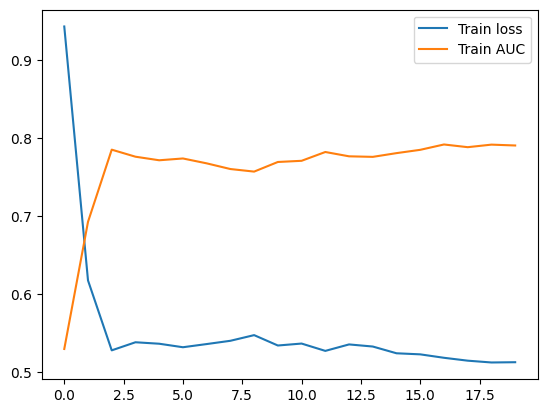

In [33]:
import matplotlib.pyplot as plt
history = model.history.history
plt.plot(history['loss'], label='Train loss')
plt.plot(history['AUC'], label='Train AUC')
plt.legend(); plt.show()


## One hot encoder for categories

In [34]:
from sklearn.preprocessing import OneHotEncoder

train_df_ohe = train_df.to_pandas()
onehot_cols = ['student_tinh_tp', 'student_to_hop_mon', 'cand_tinh_tp', 'cand_to_hop_mon']
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
onehot_feats = ohe.fit_transform(train_df_ohe[onehot_cols])
cat_cols = [
    'student_cong_lap', 'student_nhom_nganh', 'student_hoc_phi',
    'cand_cong_lap', 'cand_nhom_nganh', 'cand_hoc_phi', 'cand_ma_xet_tuyen'
]

encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    train_df_ohe[col] = le.fit_transform(train_df_ohe[col].astype(str))
    encoders[col] = le

scaler = StandardScaler()
train_df_ohe[num_cols] = scaler.fit_transform(train_df_ohe[num_cols])

import numpy as np
X_rest = train_df_ohe[cat_cols + num_cols].values
X = np.concatenate([X_rest, onehot_feats], axis=1).astype(np.float32)
y = train_df_ohe['label'].values

model = Sequential([
    Dense(128, activation='relu', input_shape=(X.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])
model.fit(
    X, y,
    epochs=20,
    batch_size=128,
    callbacks=[TqdmCallback(verbose=1)]
)


/opt/miniconda3/envs/eda/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
  0%|          | 0/20 [00:00<?, ?epoch/s]

Epoch 1/20


  38/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.5022 - loss: 8.0216      

 109/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.4989 - loss: 5.2396

 183/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.4999 - loss: 4.1238

 255/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.5012 - loss: 3.5093

 332/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.5029 - loss: 3.0778

 404/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.5045 - loss: 2.7906

 480/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.5060 - loss: 2.5614

 556/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.5074 - loss: 2.3822

 630/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.5089 - loss: 2.2413

 708/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.5104 - loss: 2.1186

 782/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.5118 - loss: 2.0207

 856/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.5133 - loss: 1.9366

 929/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.5147 - loss: 1.8646

1007/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.5163 - loss: 1.7971

1084/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.5179 - loss: 1.7384

1159/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.5194 - loss: 1.6875

1235/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.5209 - loss: 1.6412

1314/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.5225 - loss: 1.5978

1390/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.5240 - loss: 1.5599

1467/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.5256 - loss: 1.5249

1543/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.5271 - loss: 1.4932

1619/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.5286 - loss: 1.4641

1694/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.5302 - loss: 1.4374

1768/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.5317 - loss: 1.4129

1845/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.5333 - loss: 1.3892

1918/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.5348 - loss: 1.3682

1994/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.5364 - loss: 1.3476

2071/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.5381 - loss: 1.3281

2144/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.5396 - loss: 1.3106

2218/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.5412 - loss: 1.2939

2297/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.5429 - loss: 1.2770

2372/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.5446 - loss: 1.2619

2447/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.5462 - loss: 1.2475

2524/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.5479 - loss: 1.2334

2599/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.5496 - loss: 1.2203

2677/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.5513 - loss: 1.2074

2754/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.5530 - loss: 1.1952

2832/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.5548 - loss: 1.1834

2907/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.5564 - loss: 1.1725

2984/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.5582 - loss: 1.1618

3064/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.5600 - loss: 1.1511

3138/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.5616 - loss: 1.1416

3214/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.5633 - loss: 1.1322

3293/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.5651 - loss: 1.1228

3370/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.5667 - loss: 1.1139

3445/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.5684 - loss: 1.1056

3521/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.5700 - loss: 1.0975

3598/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.5717 - loss: 1.0895

3674/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.5733 - loss: 1.0819

3752/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.5750 - loss: 1.0743

3830/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.5766 - loss: 1.0670

3906/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.5782 - loss: 1.0600

3983/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.5798 - loss: 1.0532

4022/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.5806 - loss: 1.0498

  5%|▌         | 1/20 [00:05<01:53,  5.97s/epoch, AUC=0.664, loss=0.703]

4050/4050 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - AUC: 0.5812 - loss: 1.0474


Epoch 2/20
  44/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7777 - loss: 0.5291   

 133/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7821 - loss: 0.5283

 221/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7818 - loss: 0.5296

 311/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7819 - loss: 0.5300

 400/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7822 - loss: 0.5301

 488/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7816 - loss: 0.5307

 575/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7807 - loss: 0.5316

 663/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7799 - loss: 0.5324

 752/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7793 - loss: 0.5329

 840/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7788 - loss: 0.5333

 927/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7781 - loss: 0.5339

1013/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7774 - loss: 0.5345

1102/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7767 - loss: 0.5351

1193/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7760 - loss: 0.5356

1280/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7754 - loss: 0.5362

1368/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7748 - loss: 0.5367

1457/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7743 - loss: 0.5372

1547/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7738 - loss: 0.5377

1635/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7733 - loss: 0.5381

1723/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7728 - loss: 0.5386

1811/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7723 - loss: 0.5389

1898/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7719 - loss: 0.5393

1985/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7714 - loss: 0.5397

2074/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7709 - loss: 0.5401

2161/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7705 - loss: 0.5405

2250/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7701 - loss: 0.5408

2339/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7697 - loss: 0.5412

2427/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7693 - loss: 0.5416

2517/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7689 - loss: 0.5420

2604/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7685 - loss: 0.5423

2692/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7681 - loss: 0.5427

2779/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7678 - loss: 0.5430

2865/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7675 - loss: 0.5433

2954/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7672 - loss: 0.5435

3043/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7669 - loss: 0.5438

3131/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7667 - loss: 0.5440

3220/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7664 - loss: 0.5442

3304/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7662 - loss: 0.5444

3392/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7660 - loss: 0.5446

3481/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7659 - loss: 0.5448

3569/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7657 - loss: 0.5450

3657/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7655 - loss: 0.5452

3747/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7653 - loss: 0.5454

3836/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7651 - loss: 0.5455

3926/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7649 - loss: 0.5457

4017/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7647 - loss: 0.5459

 10%|█         | 2/20 [00:10<01:34,  5.24s/epoch, AUC=0.757, loss=0.553]

4050/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.7647 - loss: 0.5460


Epoch 3/20
  80/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.7617 - loss: 0.5458  

 161/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7674 - loss: 0.5404

 241/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7656 - loss: 0.5421

 320/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7633 - loss: 0.5445

 399/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7625 - loss: 0.5454

 480/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7625 - loss: 0.5455

 560/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7618 - loss: 0.5463

 640/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7612 - loss: 0.5471

 723/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7607 - loss: 0.5477

 808/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7605 - loss: 0.5481

 886/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7604 - loss: 0.5482

 965/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7604 - loss: 0.5483

1046/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7605 - loss: 0.5483

1129/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7605 - loss: 0.5483

1208/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7607 - loss: 0.5482

1291/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7608 - loss: 0.5481

1371/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7609 - loss: 0.5479

1448/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7610 - loss: 0.5478

1532/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7611 - loss: 0.5477

1614/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7612 - loss: 0.5476

1694/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7612 - loss: 0.5475

1774/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7612 - loss: 0.5475

1855/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7612 - loss: 0.5475

1937/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7612 - loss: 0.5474

2021/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7612 - loss: 0.5474

2101/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7612 - loss: 0.5474

2184/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7612 - loss: 0.5474

2266/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7611 - loss: 0.5474

2346/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7611 - loss: 0.5474

2427/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7610 - loss: 0.5475

2509/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7609 - loss: 0.5476

2592/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7609 - loss: 0.5476

2674/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7608 - loss: 0.5477

2754/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7607 - loss: 0.5478

2834/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7606 - loss: 0.5480

2918/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7605 - loss: 0.5481

2999/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7604 - loss: 0.5483

3084/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7603 - loss: 0.5484

3164/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7602 - loss: 0.5486

3247/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7601 - loss: 0.5488

3330/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7600 - loss: 0.5490

3410/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7599 - loss: 0.5491

3490/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7599 - loss: 0.5493

3575/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7598 - loss: 0.5494

3652/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7598 - loss: 0.5496

3733/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7598 - loss: 0.5497

3813/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7597 - loss: 0.5498

3894/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7597 - loss: 0.5499

3973/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7597 - loss: 0.5500

4050/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7597 - loss: 0.5501

 15%|█▌        | 3/20 [00:15<01:28,  5.18s/epoch, AUC=0.76, loss=0.555] 

4050/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.7597 - loss: 0.5501


Epoch 4/20
  41/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.7718 - loss: 0.5501   

 120/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.7773 - loss: 0.5446

 201/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7808 - loss: 0.5411

 283/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7821 - loss: 0.5389

 363/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7825 - loss: 0.5375

 445/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7832 - loss: 0.5360

 527/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7843 - loss: 0.5342

 609/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7852 - loss: 0.5328

 730/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7855 - loss: 0.5318

 809/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7852 - loss: 0.5317

 891/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7848 - loss: 0.5317

 968/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7845 - loss: 0.5318

1047/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7844 - loss: 0.5317

1127/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7843 - loss: 0.5315

1208/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7843 - loss: 0.5313

1288/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7843 - loss: 0.5311

1369/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7843 - loss: 0.5310

1451/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7843 - loss: 0.5310

1529/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7843 - loss: 0.5310

1608/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7843 - loss: 0.5310

1690/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7842 - loss: 0.5311

1767/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7842 - loss: 0.5312

1849/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7842 - loss: 0.5313

1931/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7841 - loss: 0.5315

2011/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7840 - loss: 0.5316

2090/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7840 - loss: 0.5318

2170/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7839 - loss: 0.5320

2248/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7839 - loss: 0.5321

2327/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7839 - loss: 0.5323

2408/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7839 - loss: 0.5324

2489/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7839 - loss: 0.5325

2567/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7839 - loss: 0.5326

2648/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7839 - loss: 0.5327

2728/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7840 - loss: 0.5328

2810/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7840 - loss: 0.5329

2889/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7840 - loss: 0.5329

2966/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7841 - loss: 0.5330

3043/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7841 - loss: 0.5330

3125/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7841 - loss: 0.5331

3210/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7842 - loss: 0.5332

3290/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7842 - loss: 0.5332

3370/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7842 - loss: 0.5333

3454/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7842 - loss: 0.5334

3535/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7843 - loss: 0.5334

3611/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7843 - loss: 0.5335

3692/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7843 - loss: 0.5336

3773/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7843 - loss: 0.5336

3858/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7843 - loss: 0.5337

3936/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7843 - loss: 0.5338

4015/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7844 - loss: 0.5338

 20%|██        | 4/20 [00:20<01:22,  5.18s/epoch, AUC=0.786, loss=0.536]

4050/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.7844 - loss: 0.5338


Epoch 5/20
  47/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7818 - loss: 0.5453   

 137/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7820 - loss: 0.5447

 229/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7832 - loss: 0.5433

 319/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7832 - loss: 0.5431

 409/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7845 - loss: 0.5417

 499/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7855 - loss: 0.5402

 589/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7862 - loss: 0.5391

 679/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7870 - loss: 0.5380

 767/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7874 - loss: 0.5372

 858/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7879 - loss: 0.5363

 947/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7882 - loss: 0.5357

1037/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7885 - loss: 0.5352

1127/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7888 - loss: 0.5348

1216/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7890 - loss: 0.5345

1306/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7893 - loss: 0.5343

1397/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7895 - loss: 0.5341

1486/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7896 - loss: 0.5340

1578/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7898 - loss: 0.5338

1668/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7899 - loss: 0.5337

1758/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7900 - loss: 0.5336

1848/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7901 - loss: 0.5335

1940/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7902 - loss: 0.5335

2029/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7902 - loss: 0.5335

2119/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7902 - loss: 0.5335

2208/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7903 - loss: 0.5334

2297/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7904 - loss: 0.5333

2389/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7904 - loss: 0.5332

2480/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7905 - loss: 0.5332

2571/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7906 - loss: 0.5331

2662/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7906 - loss: 0.5330

2752/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7907 - loss: 0.5329

2842/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7908 - loss: 0.5328

2932/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7909 - loss: 0.5327

3022/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7910 - loss: 0.5326

3111/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7911 - loss: 0.5324

3201/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7911 - loss: 0.5323

3288/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7912 - loss: 0.5321

3376/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7913 - loss: 0.5320

3466/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7914 - loss: 0.5319

3554/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7914 - loss: 0.5318

3642/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7915 - loss: 0.5317

3733/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7916 - loss: 0.5316

3823/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7916 - loss: 0.5314

3912/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7917 - loss: 0.5313

4003/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7918 - loss: 0.5312

4047/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7918 - loss: 0.5311

 25%|██▌       | 5/20 [00:25<01:14,  4.99s/epoch, AUC=0.795, loss=0.526]

4050/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.7918 - loss: 0.5311


Epoch 6/20
  88/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8001 - loss: 0.5157  

 174/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8003 - loss: 0.5155

 258/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7988 - loss: 0.5159

 341/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7973 - loss: 0.5167

 429/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7956 - loss: 0.5179

 473/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7948 - loss: 0.5185

 559/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7932 - loss: 0.5199

 647/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7914 - loss: 0.5217

 733/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7899 - loss: 0.5231

 819/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7888 - loss: 0.5241

 906/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7879 - loss: 0.5250

 991/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7872 - loss: 0.5257

1077/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7865 - loss: 0.5264

1166/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7860 - loss: 0.5270

1252/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7855 - loss: 0.5274

1340/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7851 - loss: 0.5278

1430/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7848 - loss: 0.5281

1516/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7845 - loss: 0.5284

1605/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7842 - loss: 0.5286

1694/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7840 - loss: 0.5288

1779/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7839 - loss: 0.5289

1862/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7837 - loss: 0.5290

1948/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7836 - loss: 0.5291

2035/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7835 - loss: 0.5293

2121/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7833 - loss: 0.5296

2208/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7832 - loss: 0.5298

2325/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7829 - loss: 0.5302

2412/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7827 - loss: 0.5305

2499/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7825 - loss: 0.5308

2584/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7824 - loss: 0.5310

2670/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7822 - loss: 0.5313

2755/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7821 - loss: 0.5315

2841/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7820 - loss: 0.5318

2926/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7818 - loss: 0.5321

3012/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7817 - loss: 0.5323

3098/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7815 - loss: 0.5326

3184/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7814 - loss: 0.5328

3271/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7813 - loss: 0.5330

3358/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7812 - loss: 0.5332

3443/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7812 - loss: 0.5334

3530/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7811 - loss: 0.5336

3616/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7811 - loss: 0.5337

3703/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7811 - loss: 0.5339

3789/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7810 - loss: 0.5340

3874/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7811 - loss: 0.5341

3959/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7811 - loss: 0.5342

4045/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7811 - loss: 0.5343

 30%|███       | 6/20 [00:30<01:09,  4.94s/epoch, AUC=0.782, loss=0.538]

4050/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.7811 - loss: 0.5343


Epoch 7/20
  75/4050 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - AUC: 0.8045 - loss: 0.5243 

 153/4050 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - AUC: 0.8024 - loss: 0.5262

 231/4050 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - AUC: 0.8012 - loss: 0.5268

 308/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8002 - loss: 0.5274

 387/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.7992 - loss: 0.5282

 466/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.7983 - loss: 0.5288

 548/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7980 - loss: 0.5287

 626/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7978 - loss: 0.5286

 706/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7977 - loss: 0.5285

 785/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7978 - loss: 0.5282

 863/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7980 - loss: 0.5278

 941/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7984 - loss: 0.5274

1020/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7986 - loss: 0.5270

1103/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7988 - loss: 0.5266

1180/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7990 - loss: 0.5263

1258/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7991 - loss: 0.5260

1337/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7993 - loss: 0.5257

1416/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7995 - loss: 0.5255

1494/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7996 - loss: 0.5253

1574/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7997 - loss: 0.5252

1653/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7998 - loss: 0.5250

1734/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7999 - loss: 0.5248

1812/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8000 - loss: 0.5246

1892/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8001 - loss: 0.5244

1972/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8001 - loss: 0.5242

2056/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8001 - loss: 0.5241

2137/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8001 - loss: 0.5241

2216/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8000 - loss: 0.5241

2295/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8000 - loss: 0.5242

2380/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7998 - loss: 0.5242

2461/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7997 - loss: 0.5243

2539/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7996 - loss: 0.5244

2614/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7994 - loss: 0.5246

2693/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7993 - loss: 0.5247

2772/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7991 - loss: 0.5249

2853/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7990 - loss: 0.5250

2932/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7988 - loss: 0.5252

3012/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7987 - loss: 0.5253

3089/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7986 - loss: 0.5254

3158/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7985 - loss: 0.5255

3237/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7984 - loss: 0.5256

3315/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7983 - loss: 0.5257

3392/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7982 - loss: 0.5258

3469/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7981 - loss: 0.5259

3548/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7980 - loss: 0.5260

3629/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7980 - loss: 0.5260

3704/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7979 - loss: 0.5261

3780/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7979 - loss: 0.5261

3857/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7978 - loss: 0.5262

3932/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7978 - loss: 0.5262

4009/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7978 - loss: 0.5262

4047/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7978 - loss: 0.5262

 35%|███▌      | 7/20 [00:35<01:06,  5.09s/epoch, AUC=0.796, loss=0.527]

4050/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.7978 - loss: 0.5262


Epoch 8/20
  46/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7813 - loss: 0.5411   

 135/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7917 - loss: 0.5284

 224/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7983 - loss: 0.5200

 313/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8023 - loss: 0.5152

 401/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8039 - loss: 0.5131

 489/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8046 - loss: 0.5121

 579/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8052 - loss: 0.5114

 670/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8054 - loss: 0.5111

 759/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8053 - loss: 0.5112

 847/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8052 - loss: 0.5115

 937/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8047 - loss: 0.5121

1027/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8043 - loss: 0.5127

1114/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8038 - loss: 0.5134

1203/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8035 - loss: 0.5139

1294/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8032 - loss: 0.5143

1383/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8030 - loss: 0.5146

1473/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8029 - loss: 0.5148

1561/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8028 - loss: 0.5150

1647/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8028 - loss: 0.5151

1737/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8027 - loss: 0.5152

1826/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8026 - loss: 0.5153

1914/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8025 - loss: 0.5154

2003/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8024 - loss: 0.5155

2086/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8024 - loss: 0.5156

2173/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8024 - loss: 0.5157

2253/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8024 - loss: 0.5157

2335/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8024 - loss: 0.5157

2439/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8023 - loss: 0.5157

2503/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8023 - loss: 0.5158

2569/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8022 - loss: 0.5159

2628/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8021 - loss: 0.5160

2719/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8020 - loss: 0.5162

2781/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8019 - loss: 0.5164

2820/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8019 - loss: 0.5165

2883/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8018 - loss: 0.5166

2947/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8017 - loss: 0.5167

3012/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8017 - loss: 0.5168

3096/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8016 - loss: 0.5169

3181/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8016 - loss: 0.5170

3257/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8015 - loss: 0.5171

3328/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8015 - loss: 0.5172

3402/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8015 - loss: 0.5172

3484/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8015 - loss: 0.5173

3564/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8014 - loss: 0.5174

3651/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8014 - loss: 0.5174

3738/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8015 - loss: 0.5174

3824/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8015 - loss: 0.5175

3910/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8015 - loss: 0.5175

3998/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8015 - loss: 0.5175

4037/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8015 - loss: 0.5175

 40%|████      | 8/20 [00:41<01:02,  5.17s/epoch, AUC=0.803, loss=0.517]

4050/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.8015 - loss: 0.5175


Epoch 9/20
  76/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.7668 - loss: 0.5652  

 150/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.7792 - loss: 0.5500

 227/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.7853 - loss: 0.5416

 307/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7906 - loss: 0.5348

 384/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7944 - loss: 0.5297

 463/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7970 - loss: 0.5260

 541/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7987 - loss: 0.5236

 620/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7999 - loss: 0.5220

 700/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8007 - loss: 0.5209

 778/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8012 - loss: 0.5203

 849/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8015 - loss: 0.5199

 916/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8018 - loss: 0.5195

 983/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8021 - loss: 0.5192

1054/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8024 - loss: 0.5189

1129/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8026 - loss: 0.5186

1206/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8029 - loss: 0.5183

1282/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8032 - loss: 0.5180

1361/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8035 - loss: 0.5176

1438/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8037 - loss: 0.5173

1515/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8039 - loss: 0.5170

1587/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8040 - loss: 0.5168

1664/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8041 - loss: 0.5167

1746/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8042 - loss: 0.5165

1817/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8042 - loss: 0.5165

1915/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8041 - loss: 0.5164

1994/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8040 - loss: 0.5165

2071/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8039 - loss: 0.5166

2146/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8037 - loss: 0.5166

2224/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8036 - loss: 0.5167

2301/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8034 - loss: 0.5168

2370/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8032 - loss: 0.5169

2435/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8031 - loss: 0.5170

2508/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8030 - loss: 0.5171

2583/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8028 - loss: 0.5172

2661/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8027 - loss: 0.5173

2731/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8026 - loss: 0.5174

2799/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8025 - loss: 0.5174

2867/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8024 - loss: 0.5174

2944/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8023 - loss: 0.5175

3024/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8022 - loss: 0.5175

3104/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8021 - loss: 0.5175

3185/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8020 - loss: 0.5176

3257/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8019 - loss: 0.5176

3333/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8019 - loss: 0.5176

3406/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8018 - loss: 0.5177

3482/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8017 - loss: 0.5177

3556/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8017 - loss: 0.5177

3629/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8016 - loss: 0.5177

3703/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8016 - loss: 0.5177

3782/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8015 - loss: 0.5177

3860/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8015 - loss: 0.5177

3938/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8014 - loss: 0.5177

4013/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8014 - loss: 0.5177

4047/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8014 - loss: 0.5178

 45%|████▌     | 9/20 [00:46<00:58,  5.33s/epoch, AUC=0.799, loss=0.518]

4050/4050 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - AUC: 0.8014 - loss: 0.5178


Epoch 10/20
  38/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.7978 - loss: 0.5199   

 114/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.7935 - loss: 0.5221

 189/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.7947 - loss: 0.5214

 259/4050 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - AUC: 0.7952 - loss: 0.5219

 338/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7953 - loss: 0.5225

 417/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.7956 - loss: 0.5227

 493/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.7957 - loss: 0.5226

 569/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.7961 - loss: 0.5221

 643/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7964 - loss: 0.5217

 717/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7968 - loss: 0.5211

 791/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7974 - loss: 0.5204

 869/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7980 - loss: 0.5196

 945/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7985 - loss: 0.5191

1017/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7987 - loss: 0.5190

1091/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7988 - loss: 0.5190

1165/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7989 - loss: 0.5191

1237/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7988 - loss: 0.5192

1315/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7987 - loss: 0.5195

1426/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7985 - loss: 0.5200

1506/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7983 - loss: 0.5203

1575/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7981 - loss: 0.5205

1641/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7980 - loss: 0.5208

1710/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7979 - loss: 0.5210

1790/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7977 - loss: 0.5213

1863/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7976 - loss: 0.5215

1936/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7975 - loss: 0.5217

2005/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7974 - loss: 0.5218

2083/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7973 - loss: 0.5220

2159/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7973 - loss: 0.5221

2239/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7972 - loss: 0.5222

2311/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7972 - loss: 0.5223

2380/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7971 - loss: 0.5224

2455/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7971 - loss: 0.5225

2511/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7971 - loss: 0.5225

2587/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7971 - loss: 0.5226

2663/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7970 - loss: 0.5226

2740/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7970 - loss: 0.5227

2844/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7970 - loss: 0.5227

2909/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7970 - loss: 0.5227

2973/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7969 - loss: 0.5228

3037/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7969 - loss: 0.5228

3107/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7969 - loss: 0.5228

3188/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7969 - loss: 0.5229

3264/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7968 - loss: 0.5229

3341/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7968 - loss: 0.5229

3406/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7968 - loss: 0.5229

3475/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7968 - loss: 0.5229

3551/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7968 - loss: 0.5229

3632/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7968 - loss: 0.5229

3710/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7968 - loss: 0.5229

3789/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7968 - loss: 0.5229

3855/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7968 - loss: 0.5229

3932/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7968 - loss: 0.5229

4011/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7968 - loss: 0.5228

 50%|█████     | 10/20 [00:52<00:54,  5.48s/epoch, AUC=0.797, loss=0.522]

4050/4050 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - AUC: 0.7968 - loss: 0.5228


Epoch 11/20
  40/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.7886 - loss: 0.5277   

 118/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.7935 - loss: 0.5221

 196/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7934 - loss: 0.5216

 274/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7928 - loss: 0.5221

 357/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7929 - loss: 0.5220

 437/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7930 - loss: 0.5220

 514/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7931 - loss: 0.5220

 596/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7935 - loss: 0.5216

 678/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7935 - loss: 0.5217

 758/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7933 - loss: 0.5219

 839/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7930 - loss: 0.5223

 909/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7929 - loss: 0.5225

 986/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7927 - loss: 0.5227

1064/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7926 - loss: 0.5228

1142/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7927 - loss: 0.5228

1215/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7927 - loss: 0.5228

1288/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7928 - loss: 0.5228

1362/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7928 - loss: 0.5228

1439/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7930 - loss: 0.5227

1516/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7931 - loss: 0.5226

1618/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7933 - loss: 0.5225

1680/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7934 - loss: 0.5224

1750/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7935 - loss: 0.5223

1829/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7936 - loss: 0.5222

1907/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7937 - loss: 0.5221

1984/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7938 - loss: 0.5220

2063/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7938 - loss: 0.5220

2140/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7939 - loss: 0.5220

2218/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7939 - loss: 0.5219

2297/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7939 - loss: 0.5219

2374/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7940 - loss: 0.5218

2452/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7940 - loss: 0.5218

2530/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7941 - loss: 0.5217

2609/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7942 - loss: 0.5216

2690/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7943 - loss: 0.5215

2776/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7943 - loss: 0.5214

2857/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7944 - loss: 0.5213

2939/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7945 - loss: 0.5212

3017/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7946 - loss: 0.5212

3094/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7946 - loss: 0.5211

3175/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7947 - loss: 0.5210

3246/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7948 - loss: 0.5209

3322/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7949 - loss: 0.5208

3400/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7949 - loss: 0.5207

3476/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7950 - loss: 0.5206

3556/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7951 - loss: 0.5205

3636/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7952 - loss: 0.5204

3714/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7953 - loss: 0.5203

3793/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7953 - loss: 0.5203

3872/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7954 - loss: 0.5202

3948/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7955 - loss: 0.5201

4026/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7956 - loss: 0.5200

 55%|█████▌    | 11/20 [00:58<00:49,  5.50s/epoch, AUC=0.799, loss=0.516]

4050/4050 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - AUC: 0.7956 - loss: 0.5200


Epoch 12/20
  40/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.8082 - loss: 0.5127   

 122/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7994 - loss: 0.5174

 200/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7978 - loss: 0.5176

 282/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7973 - loss: 0.5173

 363/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7983 - loss: 0.5161

 438/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7997 - loss: 0.5146

 519/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8011 - loss: 0.5131

 601/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8023 - loss: 0.5117

 683/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8028 - loss: 0.5112

 762/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8032 - loss: 0.5108

 845/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8035 - loss: 0.5105

 920/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8036 - loss: 0.5104

 998/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8036 - loss: 0.5103

1080/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8036 - loss: 0.5103

1159/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8037 - loss: 0.5102

1237/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8037 - loss: 0.5102

1315/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8036 - loss: 0.5103

1395/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8035 - loss: 0.5104

1475/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8034 - loss: 0.5105

1554/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8033 - loss: 0.5106

1635/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8032 - loss: 0.5106

1713/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8032 - loss: 0.5107

1789/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8031 - loss: 0.5107

1866/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8031 - loss: 0.5107

1950/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8031 - loss: 0.5107

2025/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8031 - loss: 0.5107

2108/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8031 - loss: 0.5107

2186/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8031 - loss: 0.5107

2265/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8031 - loss: 0.5107

2345/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8031 - loss: 0.5107

2423/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8031 - loss: 0.5107

2503/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8030 - loss: 0.5107

2579/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8030 - loss: 0.5107

2658/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8030 - loss: 0.5107

2737/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8030 - loss: 0.5107

2815/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8030 - loss: 0.5107

2892/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8030 - loss: 0.5107

2974/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8030 - loss: 0.5106

3049/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8030 - loss: 0.5106

3127/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8030 - loss: 0.5106

3208/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8030 - loss: 0.5106

3288/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8030 - loss: 0.5105

3368/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8030 - loss: 0.5105

3448/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8030 - loss: 0.5105

3526/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8030 - loss: 0.5105

3603/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8030 - loss: 0.5105

3681/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8030 - loss: 0.5105

3761/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8029 - loss: 0.5105

3842/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8029 - loss: 0.5105

3920/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8029 - loss: 0.5105

3991/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8029 - loss: 0.5105

4031/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8028 - loss: 0.5105

 60%|██████    | 12/20 [01:03<00:43,  5.49s/epoch, AUC=0.802, loss=0.511]

4050/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.8028 - loss: 0.5105


Epoch 13/20
  39/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.8174 - loss: 0.4941   

 121/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8087 - loss: 0.5005

 203/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8023 - loss: 0.5065

 276/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8004 - loss: 0.5088

 349/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8003 - loss: 0.5094

 423/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8004 - loss: 0.5096

 495/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8002 - loss: 0.5100

 568/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8001 - loss: 0.5103

 645/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7998 - loss: 0.5107

 730/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7996 - loss: 0.5110

 810/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7996 - loss: 0.5110

 922/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7997 - loss: 0.5109

1002/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7997 - loss: 0.5110

1079/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7996 - loss: 0.5111

1159/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7995 - loss: 0.5111

1202/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7995 - loss: 0.5111

1307/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7995 - loss: 0.5112

1378/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7994 - loss: 0.5112

1453/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7995 - loss: 0.5112

1529/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7995 - loss: 0.5111

1608/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7995 - loss: 0.5111

1683/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7995 - loss: 0.5111

1757/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7996 - loss: 0.5111

1823/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7996 - loss: 0.5110

1888/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7997 - loss: 0.5109

1963/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7998 - loss: 0.5108

2032/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7999 - loss: 0.5108

2095/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8000 - loss: 0.5107

2159/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8001 - loss: 0.5106

2228/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8002 - loss: 0.5105

2303/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8002 - loss: 0.5105

2382/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8003 - loss: 0.5104

2456/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8003 - loss: 0.5104

2532/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8004 - loss: 0.5103

2600/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8005 - loss: 0.5103

2667/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8005 - loss: 0.5102

2734/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8006 - loss: 0.5102

2811/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8006 - loss: 0.5101

2893/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8007 - loss: 0.5100

2961/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8008 - loss: 0.5099

3032/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8009 - loss: 0.5099

3102/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8009 - loss: 0.5098

3176/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8010 - loss: 0.5097

3243/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8010 - loss: 0.5097

3308/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8011 - loss: 0.5096

3376/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8012 - loss: 0.5095

3450/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8013 - loss: 0.5094

3524/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8014 - loss: 0.5093

3589/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8014 - loss: 0.5092

3675/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8016 - loss: 0.5091

3740/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8016 - loss: 0.5090

3815/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8017 - loss: 0.5089

3881/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8018 - loss: 0.5089

3949/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8019 - loss: 0.5088

4021/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8019 - loss: 0.5087

 65%|██████▌   | 13/20 [01:09<00:39,  5.64s/epoch, AUC=0.806, loss=0.505]

4050/4050 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - AUC: 0.8020 - loss: 0.5087


Epoch 14/20
  38/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.7880 - loss: 0.5230   

 108/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.7986 - loss: 0.5096

 172/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.8022 - loss: 0.5053

 238/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.8028 - loss: 0.5045

 311/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.8021 - loss: 0.5052

 386/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.8017 - loss: 0.5054

 464/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.8021 - loss: 0.5050

 542/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8028 - loss: 0.5043

 650/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.8039 - loss: 0.5033

 728/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8045 - loss: 0.5027

 808/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8050 - loss: 0.5023

 887/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8054 - loss: 0.5019

 927/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8055 - loss: 0.5018

1004/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8057 - loss: 0.5017

1082/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8058 - loss: 0.5017

1162/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8059 - loss: 0.5016

1240/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8060 - loss: 0.5016

1317/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8059 - loss: 0.5017

1394/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8059 - loss: 0.5018

1474/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8058 - loss: 0.5020

1579/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8057 - loss: 0.5022

1644/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8057 - loss: 0.5023

1708/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8056 - loss: 0.5024

1778/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8056 - loss: 0.5026

1855/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8055 - loss: 0.5027

1932/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8055 - loss: 0.5028

1999/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8054 - loss: 0.5029

2069/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8054 - loss: 0.5030

2149/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8054 - loss: 0.5031

2228/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8053 - loss: 0.5032

2300/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8053 - loss: 0.5032

2372/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8053 - loss: 0.5033

2443/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8053 - loss: 0.5033

2511/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8053 - loss: 0.5034

2580/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8053 - loss: 0.5034

2655/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8053 - loss: 0.5035

2725/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8052 - loss: 0.5035

2799/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8052 - loss: 0.5036

2864/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8052 - loss: 0.5036

2930/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8052 - loss: 0.5036

2997/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8052 - loss: 0.5036

3063/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8052 - loss: 0.5036

3132/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8052 - loss: 0.5036

3206/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8052 - loss: 0.5037

3279/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8052 - loss: 0.5037

3353/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8052 - loss: 0.5037

3423/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8052 - loss: 0.5037

3494/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8052 - loss: 0.5037

3566/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8052 - loss: 0.5037

3629/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8052 - loss: 0.5037

3691/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8052 - loss: 0.5037

3752/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8052 - loss: 0.5037

3820/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8052 - loss: 0.5037

3896/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8052 - loss: 0.5037

3974/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8052 - loss: 0.5037

4050/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8052 - loss: 0.5038

 70%|███████   | 14/20 [01:15<00:34,  5.76s/epoch, AUC=0.805, loss=0.504]

4050/4050 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - AUC: 0.8052 - loss: 0.5038


Epoch 15/20
  40/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.8330 - loss: 0.4799   

 116/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.8193 - loss: 0.4891

 195/4050 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - AUC: 0.8165 - loss: 0.4914

 267/4050 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - AUC: 0.8151 - loss: 0.4927

 343/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8138 - loss: 0.4940

 421/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8126 - loss: 0.4952

 502/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.8117 - loss: 0.4962

 580/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.8115 - loss: 0.4965

 658/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8113 - loss: 0.4967

 736/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8110 - loss: 0.4970

 811/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8108 - loss: 0.4972

 891/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8107 - loss: 0.4974

 968/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8106 - loss: 0.4976

1045/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8104 - loss: 0.4978

1117/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8103 - loss: 0.4980

1196/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8102 - loss: 0.4982

1276/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8100 - loss: 0.4985

1355/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8099 - loss: 0.4987

1428/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8098 - loss: 0.4989

1497/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8097 - loss: 0.4990

1564/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8096 - loss: 0.4992

1641/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8094 - loss: 0.4995

1718/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8092 - loss: 0.4998

1795/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8090 - loss: 0.5001

1873/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8087 - loss: 0.5004

1950/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8085 - loss: 0.5008

2046/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8082 - loss: 0.5012

2109/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8080 - loss: 0.5014

2180/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8078 - loss: 0.5017

2249/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8076 - loss: 0.5019

2312/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8075 - loss: 0.5021

2379/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8074 - loss: 0.5023

2455/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8072 - loss: 0.5025

2534/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8071 - loss: 0.5027

2605/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8070 - loss: 0.5028

2673/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8069 - loss: 0.5029

2738/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8068 - loss: 0.5030

2814/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8067 - loss: 0.5032

2888/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8066 - loss: 0.5033

2954/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8065 - loss: 0.5035

3019/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8064 - loss: 0.5036

3086/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8064 - loss: 0.5037

3163/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8063 - loss: 0.5038

3233/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8062 - loss: 0.5039

3300/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8062 - loss: 0.5039

3365/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8061 - loss: 0.5040

3438/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8060 - loss: 0.5041

3517/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8060 - loss: 0.5041

3589/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8059 - loss: 0.5042

3642/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8059 - loss: 0.5042

3719/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8059 - loss: 0.5043

3791/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8058 - loss: 0.5043

3857/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8058 - loss: 0.5044

3923/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8058 - loss: 0.5044

3993/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8057 - loss: 0.5044

4033/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8057 - loss: 0.5045

 75%|███████▌  | 15/20 [01:21<00:29,  5.85s/epoch, AUC=0.803, loss=0.507]

4050/4050 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - AUC: 0.8057 - loss: 0.5045


Epoch 16/20
  41/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.8044 - loss: 0.5057   

 117/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.8078 - loss: 0.5028

 194/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.8055 - loss: 0.5069

 270/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8018 - loss: 0.5123

 344/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7984 - loss: 0.5165

 418/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7956 - loss: 0.5199

 491/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7934 - loss: 0.5225

 566/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7916 - loss: 0.5246

 644/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7900 - loss: 0.5264

 724/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7888 - loss: 0.5277

 801/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7879 - loss: 0.5287

 881/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7870 - loss: 0.5296

 958/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7861 - loss: 0.5305

1038/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7854 - loss: 0.5312

1110/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7848 - loss: 0.5318

1174/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7844 - loss: 0.5321

1241/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7841 - loss: 0.5324

1313/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7840 - loss: 0.5325

1388/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7839 - loss: 0.5325

1456/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7838 - loss: 0.5325

1552/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7839 - loss: 0.5323

1621/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7839 - loss: 0.5322

1688/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7840 - loss: 0.5320

1755/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7841 - loss: 0.5319

1824/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7842 - loss: 0.5317

1881/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7843 - loss: 0.5315

1953/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7845 - loss: 0.5313

2019/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7846 - loss: 0.5312

2096/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7847 - loss: 0.5310

2173/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7849 - loss: 0.5307

2244/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7850 - loss: 0.5305

2319/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7852 - loss: 0.5303

2398/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7854 - loss: 0.5300

2474/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7855 - loss: 0.5298

2543/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7856 - loss: 0.5297

2608/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7858 - loss: 0.5295

2673/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7858 - loss: 0.5294

2746/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7859 - loss: 0.5292

2830/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7861 - loss: 0.5291

2898/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7861 - loss: 0.5289

2975/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7862 - loss: 0.5288

3048/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7863 - loss: 0.5287

3117/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7864 - loss: 0.5285

3185/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7865 - loss: 0.5284

3263/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7866 - loss: 0.5283

3343/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7867 - loss: 0.5282

3420/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7868 - loss: 0.5280

3501/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7869 - loss: 0.5279

3580/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7870 - loss: 0.5278

3660/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7871 - loss: 0.5277

3741/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7872 - loss: 0.5275

3819/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7872 - loss: 0.5274

3900/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7873 - loss: 0.5273

3974/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7874 - loss: 0.5272

4013/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7874 - loss: 0.5272

 80%|████████  | 16/20 [01:27<00:23,  5.86s/epoch, AUC=0.791, loss=0.521]

4050/4050 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - AUC: 0.7875 - loss: 0.5271


Epoch 17/20
  41/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.8081 - loss: 0.4931   

 119/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.8102 - loss: 0.4950

 197/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8111 - loss: 0.4951

 276/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8100 - loss: 0.4965

 355/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8086 - loss: 0.4981

 434/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8073 - loss: 0.4997

 516/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8061 - loss: 0.5011

 596/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8052 - loss: 0.5021

 676/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8046 - loss: 0.5027

 758/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8041 - loss: 0.5033

 838/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8036 - loss: 0.5038

 925/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8032 - loss: 0.5044

1002/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8028 - loss: 0.5050

1079/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8024 - loss: 0.5055

1161/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8020 - loss: 0.5059

1240/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8018 - loss: 0.5062

1318/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8017 - loss: 0.5064

1401/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8015 - loss: 0.5067

1482/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8014 - loss: 0.5069

1555/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8012 - loss: 0.5071

1623/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8011 - loss: 0.5072

1688/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8010 - loss: 0.5074

1764/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8008 - loss: 0.5076

1843/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8007 - loss: 0.5077

1919/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8006 - loss: 0.5079

1998/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8005 - loss: 0.5080

2101/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8004 - loss: 0.5081

2167/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8004 - loss: 0.5081

2237/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8004 - loss: 0.5082

2306/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8003 - loss: 0.5083

2381/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8003 - loss: 0.5083

2463/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8003 - loss: 0.5084

2544/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8003 - loss: 0.5084

2622/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8003 - loss: 0.5084

2701/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8003 - loss: 0.5084

2783/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8003 - loss: 0.5084

2861/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8003 - loss: 0.5084

2938/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8003 - loss: 0.5084

3020/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8003 - loss: 0.5084

3097/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8003 - loss: 0.5084

3178/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8003 - loss: 0.5084

3260/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8003 - loss: 0.5084

3344/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8003 - loss: 0.5083

3423/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8003 - loss: 0.5083

3505/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8004 - loss: 0.5083

3584/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8004 - loss: 0.5083

3666/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8004 - loss: 0.5082

3747/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8004 - loss: 0.5082

3825/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8005 - loss: 0.5082

3904/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8005 - loss: 0.5081

3989/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8005 - loss: 0.5081

4029/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8005 - loss: 0.5081

 85%|████████▌ | 17/20 [01:33<00:17,  5.74s/epoch, AUC=0.802, loss=0.507]

4050/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.8005 - loss: 0.5081


Epoch 18/20
  42/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8350 - loss: 0.4755   

 142/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.8212 - loss: 0.4880

 200/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8169 - loss: 0.4934

 282/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.8117 - loss: 0.4996

 360/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.8083 - loss: 0.5035

 440/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.8055 - loss: 0.5065

 521/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8033 - loss: 0.5088

 601/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8016 - loss: 0.5105

 682/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8002 - loss: 0.5119

 762/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7991 - loss: 0.5129

 842/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7982 - loss: 0.5138

 922/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7975 - loss: 0.5146

1003/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.7969 - loss: 0.5151

1083/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7965 - loss: 0.5155

1165/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7963 - loss: 0.5157

1247/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7963 - loss: 0.5156

1315/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7963 - loss: 0.5156

1395/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7964 - loss: 0.5154

1476/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7965 - loss: 0.5153

1556/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7966 - loss: 0.5151

1638/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7966 - loss: 0.5150

1719/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.7967 - loss: 0.5149

1799/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7968 - loss: 0.5148

1877/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7968 - loss: 0.5146

1955/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7969 - loss: 0.5145

2039/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7970 - loss: 0.5144

2119/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7970 - loss: 0.5143

2200/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7971 - loss: 0.5142

2269/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7971 - loss: 0.5141

2350/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7972 - loss: 0.5140

2432/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7973 - loss: 0.5139

2512/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.7974 - loss: 0.5137

2590/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7975 - loss: 0.5136

2673/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7976 - loss: 0.5134

2754/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7977 - loss: 0.5132

2833/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7978 - loss: 0.5131

2914/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7980 - loss: 0.5129

2997/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7981 - loss: 0.5127

3080/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7983 - loss: 0.5125

3158/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7984 - loss: 0.5123

3240/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7985 - loss: 0.5121

3320/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7987 - loss: 0.5119

3392/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7988 - loss: 0.5118

3472/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7989 - loss: 0.5116

3551/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7990 - loss: 0.5115

3634/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7991 - loss: 0.5113

3716/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7992 - loss: 0.5112

3797/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7993 - loss: 0.5110

3876/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7994 - loss: 0.5109

3956/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7995 - loss: 0.5107

4036/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7996 - loss: 0.5106

 90%|█████████ | 18/20 [01:38<00:11,  5.64s/epoch, AUC=0.804, loss=0.504]

4050/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.7996 - loss: 0.5106


Epoch 19/20
  40/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.8148 - loss: 0.4897   

 119/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.8170 - loss: 0.4904

 198/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8172 - loss: 0.4911

 274/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8165 - loss: 0.4922

 352/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8155 - loss: 0.4933

 429/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8151 - loss: 0.4936

 530/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - AUC: 0.8150 - loss: 0.4935

 608/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8151 - loss: 0.4932

 687/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8152 - loss: 0.4929

 764/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8153 - loss: 0.4926

 844/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8156 - loss: 0.4921

 921/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8157 - loss: 0.4918

1000/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8159 - loss: 0.4915

1080/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.8162 - loss: 0.4911

1162/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8165 - loss: 0.4907

1240/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8167 - loss: 0.4904

1319/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8169 - loss: 0.4901

1397/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8170 - loss: 0.4899

1473/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8170 - loss: 0.4898

1553/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8170 - loss: 0.4897

1634/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8170 - loss: 0.4898

1715/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8169 - loss: 0.4898

1792/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8168 - loss: 0.4899

1873/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8166 - loss: 0.4901

1951/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8164 - loss: 0.4902

2032/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8162 - loss: 0.4905

2110/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8160 - loss: 0.4907

2186/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8158 - loss: 0.4908

2260/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8157 - loss: 0.4910

2340/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8155 - loss: 0.4912

2421/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8153 - loss: 0.4914

2501/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - AUC: 0.8151 - loss: 0.4916

2585/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8149 - loss: 0.4918

2666/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8148 - loss: 0.4920

2747/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8146 - loss: 0.4921

2827/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8145 - loss: 0.4923

2911/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8143 - loss: 0.4924

2992/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8141 - loss: 0.4926

3070/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8139 - loss: 0.4928

3152/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8138 - loss: 0.4930

3228/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8136 - loss: 0.4932

3305/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8135 - loss: 0.4933

3384/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8133 - loss: 0.4935

3463/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8132 - loss: 0.4936

3544/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8130 - loss: 0.4938

3625/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8129 - loss: 0.4939

3702/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8128 - loss: 0.4941

3783/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8126 - loss: 0.4942

3858/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8125 - loss: 0.4944

3925/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8124 - loss: 0.4945

3985/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8123 - loss: 0.4946

4049/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8122 - loss: 0.4947

 95%|█████████▌| 19/20 [01:44<00:05,  5.60s/epoch, AUC=0.807, loss=0.501]

4050/4050 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - AUC: 0.8122 - loss: 0.4947


Epoch 20/20
  63/4050 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - AUC: 0.8022 - loss: 0.5112  

 133/4050 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - AUC: 0.8029 - loss: 0.5092

 204/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8037 - loss: 0.5078

 265/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8043 - loss: 0.5066

 326/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8045 - loss: 0.5059

 395/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8047 - loss: 0.5052

 459/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8049 - loss: 0.5048

 510/4050 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - AUC: 0.8050 - loss: 0.5044

 581/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8052 - loss: 0.5040

 644/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8054 - loss: 0.5036

 708/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8054 - loss: 0.5035

 774/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8052 - loss: 0.5036

 851/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8047 - loss: 0.5040

 926/4050 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8042 - loss: 0.5043

1004/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8037 - loss: 0.5047

1079/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8032 - loss: 0.5051

1164/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8026 - loss: 0.5056

1241/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8021 - loss: 0.5061

1319/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8017 - loss: 0.5064

1397/4050 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8013 - loss: 0.5068

1475/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8010 - loss: 0.5070

1546/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8008 - loss: 0.5072

1616/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8006 - loss: 0.5074

1686/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8004 - loss: 0.5075

1760/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8003 - loss: 0.5076

1819/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8002 - loss: 0.5076

1878/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8001 - loss: 0.5077

1947/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8000 - loss: 0.5078

2014/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.7999 - loss: 0.5079

2078/4050 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.7998 - loss: 0.5079

2141/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7997 - loss: 0.5079

2214/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7997 - loss: 0.5079

2284/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7996 - loss: 0.5080

2357/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7996 - loss: 0.5080

2457/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7995 - loss: 0.5080

2519/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7995 - loss: 0.5080

2584/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7995 - loss: 0.5080

2647/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7995 - loss: 0.5080

2720/4050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7995 - loss: 0.5080

2793/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7995 - loss: 0.5080

2859/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7995 - loss: 0.5080

2925/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7995 - loss: 0.5079

2993/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7995 - loss: 0.5079

3060/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7995 - loss: 0.5079

3123/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7995 - loss: 0.5079

3186/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7995 - loss: 0.5079

3251/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7994 - loss: 0.5079

3328/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7994 - loss: 0.5079

3401/4050 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7994 - loss: 0.5079

3477/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7994 - loss: 0.5079

3542/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7994 - loss: 0.5079

3604/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7994 - loss: 0.5079

3678/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7993 - loss: 0.5079

3755/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7993 - loss: 0.5079

3831/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7993 - loss: 0.5079

3909/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7993 - loss: 0.5078

3983/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7993 - loss: 0.5078

4022/4050 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.7993 - loss: 0.5078

100%|██████████| 20/20 [01:50<00:00,  5.82s/epoch, AUC=0.8, loss=0.507]  

4050/4050 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - AUC: 0.7993 - loss: 0.5078


100%|██████████| 20/20 [01:50<00:00,  5.52s/epoch, AUC=0.8, loss=0.507]


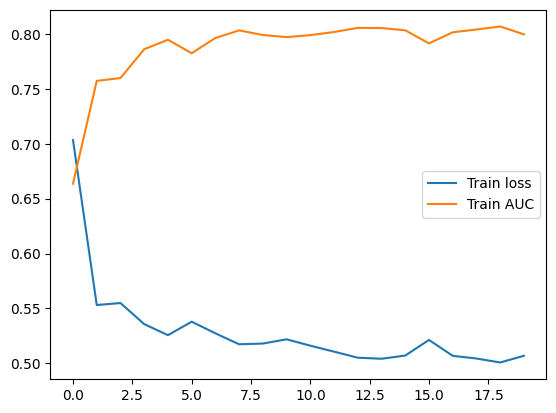

In [36]:
import matplotlib.pyplot as plt
history = model.history.history
plt.plot(history['loss'], label='Train loss')
plt.plot(history['AUC'], label='Train AUC')
plt.legend(); plt.show()


## Based tree: Lightgbm

In [99]:
import lightgbm as lgb

d_train = lgb.Dataset(X, label=y)

params = {
    'objective': 'binary',
    'metric': 'auc',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'verbose': -1
}
evals_result = {}

lgb_model = lgb.train(
    params,
    d_train,
    num_boost_round=100,
    valid_sets=[d_train],
    callbacks=[lgb.record_evaluation(evals_result), lgb.log_evaluation(period=10)]
)

[10]	training's auc: 0.995998
[20]	training's auc: 0.997185
[30]	training's auc: 0.998025
[40]	training's auc: 0.998494
[50]	training's auc: 0.998875
[60]	training's auc: 0.999128
[70]	training's auc: 0.999305
[80]	training's auc: 0.999442
[90]	training's auc: 0.999546
[100]	training's auc: 0.999644


In [100]:
print(evals_result)

{'training': OrderedDict([('auc', [np.float64(0.9859354173404955), np.float64(0.9873988366778021), np.float64(0.9904137800191822), np.float64(0.9920376858892999), np.float64(0.9943836824170288), np.float64(0.9946111936694791), np.float64(0.9951436900316674), np.float64(0.9956248558322782), np.float64(0.9959339184330361), np.float64(0.9959978299571013), np.float64(0.9961630304621363), np.float64(0.9963378703739042), np.float64(0.9964255611195711), np.float64(0.9965377554040453), np.float64(0.9967029948744273), np.float64(0.9968967279262018), np.float64(0.9969649598784492), np.float64(0.9970326944858923), np.float64(0.9971238656688208), np.float64(0.9971847411379661), np.float64(0.9972716741611706), np.float64(0.9973322859210759), np.float64(0.9974351708117538), np.float64(0.9974869630471045), np.float64(0.9975705043783394), np.float64(0.9977868142860495), np.float64(0.9978205827975609), np.float64(0.9978657274016177), np.float64(0.9980201542639852), np.float64(0.998024869875914), np.flo

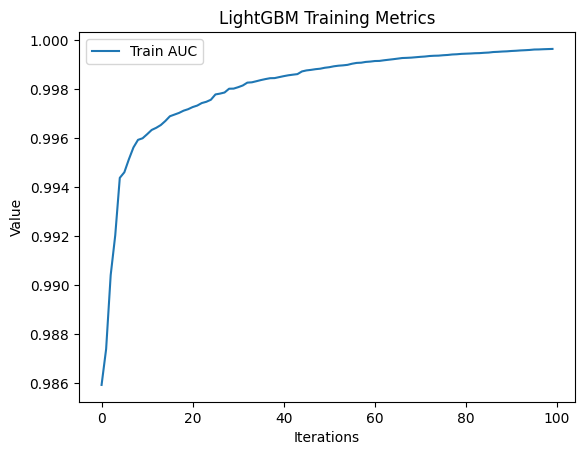

In [101]:
metric_dict = evals_result['training']
if 'binary_logloss' in metric_dict:
    plt.plot(metric_dict['binary_logloss'], label='Train Loss')
if 'auc' in metric_dict:
    plt.plot(metric_dict['auc'], label='Train AUC')
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.legend()
plt.title('LightGBM Training Metrics')
plt.show()

In [38]:
candidate_list_pl

cong_lap,tinh_tp,to_hop_mon,diem_chuan,hoc_phi,ten_ccta,diem_ccta,diem_quy_doi,hk10,hk11,hk12,hl10,hl11,hl12,nhom_nganh,ma_xet_tuyen
i64,str,str,f64,cat,str,str,f64,i64,i64,i64,i64,i64,f64,i64,str
1,"""An Giang""","""VNUHCM""",617.0,"""10M-20M""","""0""","""0""",0.0,10,10,10,10,10,10.0,714,"""QSA7140201ĐGNL"""
1,"""An Giang""","""VNUHCM""",635.0,"""10M-20M""","""0""","""0""",0.0,10,10,10,10,10,10.0,714,"""QSA7140205ĐGNL"""
1,"""An Giang""","""VNUHCM""",614.0,"""10M-20M""","""0""","""0""",0.0,10,10,10,10,10,10.0,714,"""QSA7140202ĐGNL"""
1,"""An Giang""","""VNUHCM""",831.0,"""10M-20M""","""0""","""0""",0.0,10,10,10,10,10,10.0,714,"""QSA7140209ĐGNL"""
1,"""An Giang""","""VNUHCM""",688.0,"""10M-20M""","""0""","""0""",0.0,10,10,10,10,10,10.0,714,"""QSA7140211ĐGNL"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1,"""TP. Hồ Chí Minh""","""D15""",27.85,"""10M-20M""","""0""","""0""",0.0,10,10,10,10,10,10.0,722,"""VHS7229040THPTQG"""
1,"""TP. Hồ Chí Minh""","""C00""",25.5,"""10M-20M""","""0""","""0""",0.0,10,10,10,10,10,10.0,722,"""VHS7229040THPTQG"""
1,"""TP. Hồ Chí Minh""","""D01""",25.5,"""10M-20M""","""0""","""0""",0.0,10,10,10,10,10,10.0,722,"""VHS7229040THPTQG"""


In [76]:
def test_to_X(student_info: pl.DataFrame, candidate_list: pl.DataFrame) -> pl.DataFrame:

    student_rows = student_info.to_dicts()
    candidate_rows = candidate_list.to_dicts()
    test_df = []   
    for student_row in student_rows:
        candidates = [cand for cand in candidate_rows if
            (student_row['tinh_tp'] == cand['tinh_tp']) and
            (student_row['to_hop_mon'] == cand['to_hop_mon']) and
            (student_row['cong_lap'] == cand['cong_lap']) and
            (student_row['nhom_nganh'] == cand['nhom_nganh']) and
            (student_row['hoc_phi'] == cand['hoc_phi'])
        ]
        print(candidates) 
        for cand in candidates:
            row = {}
            for col in student_row:
                row[f'student_{col}'] = student_row[col]
            for col in cand:
                row[f'cand_{col}'] = cand[col]
            test_df.append(row)
    return pl.DataFrame(test_df)

In [77]:
def predict_lgb(model, test_df: pd.DataFrame) -> pd.DataFrame:
    cat_cols = [
        'student_cong_lap', 'student_nhom_nganh', 'student_hoc_phi',
        'cand_cong_lap', 'cand_nhom_nganh', 'cand_hoc_phi', 'cand_ma_xet_tuyen'
    ]

    num_cols = [
        'student_diem_chuan', 'student_hk10', 'student_hk11', 'student_hk12', 'student_hl10', 'student_hl11', 'student_hl12',
        'cand_diem_chuan', 'cand_hk10', 'cand_hk11', 'cand_hk12', 'cand_hl10', 'cand_hl11', 'cand_hl12'
    ]
    for col in cat_cols:
        le = encoders[col]
        test_df[col] = le.transform(test_df[col].astype(str))

    onehot_feats = ohe.transform(test_df[onehot_cols])

    numeric_scaled = scaler.transform(test_df[num_cols])

    cat_feats = test_df[cat_cols].values

    X_test = np.concatenate([cat_feats, numeric_scaled, onehot_feats], axis=1).astype(np.float32)

    scores = model.predict(X_test)
    test_df['score'] = scores
    test_df['label'] = (scores > 0.5).astype(int)

    return test_df

In [104]:
import random

student_info = pl.DataFrame([{
    'cong_lap': 1,
    'tinh_tp': 'TP. Hồ Chí Minh', 
    'to_hop_mon': 'A00', 
    'ten_ccta': '0',
    'diem_ccta': '0',
    'diem_chuan': 27.0,
    'hoc_phi': '10M-20M',
    'diem_quy_doi': 0.0,
    'hk10': 1,
    'hk11': 1,
    'hk12': 1,
    'hl10': 2,
    'hl11': 1,
    'hl12': 1,
    'nhom_nganh': 275,
},
{
    'cong_lap': 1,
    'tinh_tp': 'TP. Hồ Chí Minh', 
    'to_hop_mon': 'A00', 
    'ten_ccta': '0',
    'diem_ccta': '0',
    'diem_chuan': 22.0,
    'hoc_phi': '10M-20M',
    'diem_quy_doi': 0.0,
    'hk10': 1,
    'hk11': 1,
    'hk12': 1,
    'hl10': 2,
    'hl11': 1,
    'hl12': 1,
    'nhom_nganh': 275,
},
{
    'cong_lap': 1,
    'tinh_tp': 'Vũng Tàu', 
    'to_hop_mon': 'D01', 
    'ten_ccta': 'CEFR',
    'diem_ccta': 'A1',
    'diem_chuan': 20.0,
    'hoc_phi': '10M-20M',
    'diem_quy_doi': 0.0,
    'hk10': 2,
    'hk11': 1,
    'hk12': 2,
    'hl10': 2,
    'hl11': 2,
    'hl12': 2,
    'nhom_nganh': 748,
},
{
    'cong_lap': 1,
    'tinh_tp': 'TP. Hồ Chí Minh', 
    'to_hop_mon': 'HSA', 
    'ten_ccta': '0',
    'diem_ccta': '0',
    'diem_chuan': 70.0,
    'hoc_phi': '40M-60M',
    'diem_quy_doi': 0.0,
    'hk10': 1,
    'hk11': 1,
    'hk12': 1,
    'hl10': 2,
    'hl11': 1,
    'hl12': 1,
    'nhom_nganh': 781,
},
{
    'cong_lap': 0,
    'tinh_tp': 'TP. Hồ Chí Minh', 
    'to_hop_mon': 'IELTS', 
    'ten_ccta': '0',
    'diem_ccta': '0',
    'diem_chuan': 6.0,
    'hoc_phi': '40M-60M',
    'diem_quy_doi': 0.0,
    'hk10': 1,
    'hk11': 1,
    'hk12': 1,
    'hl10': 2,
    'hl11': 1,
    'hl12': 1,
    'nhom_nganh': 748,
},
{
    'cong_lap': 1,
    'tinh_tp': 'TP. Hồ Chí Minh', 
    'to_hop_mon': 'D92', 
    'ten_ccta': '0',
    'diem_ccta': '0',
    'diem_chuan': 14.0,
    'hoc_phi': '10M-20M',
    'diem_quy_doi': 0.0,
    'hk10': 1,
    'hk11': 1,
    'hk12': 1,
    'hl10': 2,
    'hl11': 1,
    'hl12': 1,
    'nhom_nganh': 751,
},
{
    'cong_lap': 0,
    'tinh_tp': 'TP. Hồ Chí Minh', 
    'to_hop_mon': 'VNUHCM', 
    'ten_ccta': '0',
    'diem_ccta': '0',
    'diem_chuan': 600.0,
    'hoc_phi': '20M-40M',
    'diem_quy_doi': 0.0,
    'hk10': 1,
    'hk11': 1,
    'hk12': 1,
    'hl10': 2,
    'hl11': 1,

  'hl12': 1,
    'nhom_nganh': 744,
},
{
    'cong_lap': 1,
    'tinh_tp': 'Cần Thơ', 
    'to_hop_mon': 'B00', 
    'ten_ccta': '0',
    'diem_ccta': '0',
    'diem_chuan': 26.8,
    'hoc_phi': '10M-20M',
    'diem_quy_doi': 0.0,
    'hk10': 1,
    'hk11': 1,
    'hk12': 1,
    'hl10': 2,
    'hl11': 1,
    'hl12': 1,
    'nhom_nganh': 275,
},
{
    'cong_lap': 1,
    'tinh_tp': 'TP. Hồ Chí Minh', 
    'to_hop_mon': 'B08', 
    'ten_ccta': '0',
    'diem_ccta': '0',
    'diem_chuan': 16.0,
    'hoc_phi': '40M-60M',
    'diem_quy_doi': 0.0,
    'hk10': 1,
    'hk11': 1,
    'hk12': 1,
    'hl10': 2,
    'hl11': 1,
    'hl12': 1,
    'nhom_nganh': 781,
},
{
    'cong_lap': 1,
    'tinh_tp': 'Trà Vinh', 
    'to_hop_mon': 'A01', 
    'ten_ccta': '0',
    'diem_ccta': '0',
    'diem_chuan': 225,
    'hoc_phi': '20M-40M',
    'diem_quy_doi': 0.0,
    'hk10': 1,
    'hk11': 1,
    'hk12': 1,
    'hl10': 2,
    'hl11': 1,
    'hl12': 1,
    'nhom_nganh': 748,
},
{
    'cong_lap': 1,
    'tinh_tp': 'TP. Hồ Chí Minh', 
    'to_hop_mon': 'IB', 
    'ten_ccta': '0',
    'diem_ccta': '0',
    'diem_chuan': 26.5,
    'hoc_phi': '20M-40M',
    'diem_quy_doi': 0.0,
    'hk10': 1,
    'hk11': 1,
    'hk12': 1,
    'hl10': 2,
    'hl11': 1,
    'hl12': 1,
    'nhom_nganh': 734,
},{
    'cong_lap': 0,
    'tinh_tp': 'TP. Hồ Chí Minh', 
    'to_hop_mon': 'HocBa', 
    'ten_ccta': 'CEFR',
    'diem_ccta': 'B1',
    'diem_chuan': 6.5,
    'hoc_phi': '20M-40M',
    'diem_quy_doi': 1.5,
    'hk10': 1,
    'hk11': 1,
    'hk12': 1,
    'hl10': 2,
    'hl11': 1,
    'hl12': 1,
    'nhom_nganh': 734,
}])
print(1, student_info)
test_df = test_to_X(student_info, candidate_list_pl)
print(test_df)

result = predict_lgb(lgb_model, test_df.to_pandas())


1 shape: (12, 15)
┌──────────┬─────────────────┬────────────┬──────────┬───┬──────┬──────┬──────┬────────────┐
│ cong_lap ┆ tinh_tp         ┆ to_hop_mon ┆ ten_ccta ┆ … ┆ hl10 ┆ hl11 ┆ hl12 ┆ nhom_nganh │
│ ---      ┆ ---             ┆ ---        ┆ ---      ┆   ┆ ---  ┆ ---  ┆ ---  ┆ ---        │
│ i64      ┆ str             ┆ str        ┆ str      ┆   ┆ i64  ┆ i64  ┆ i64  ┆ i64        │
╞══════════╪═════════════════╪════════════╪══════════╪═══╪══════╪══════╪══════╪════════════╡
│ 1        ┆ TP. Hồ Chí Minh ┆ A00        ┆ 0        ┆ … ┆ 2    ┆ 1    ┆ 1    ┆ 275        │
│ 1        ┆ TP. Hồ Chí Minh ┆ A00        ┆ 0        ┆ … ┆ 2    ┆ 1    ┆ 1    ┆ 275        │
│ 1        ┆ Vũng Tàu        ┆ D01        ┆ CEFR     ┆ … ┆ 2    ┆ 2    ┆ 2    ┆ 748        │
│ 1        ┆ TP. Hồ Chí Minh ┆ HSA        ┆ 0        ┆ … ┆ 2    ┆ 1    ┆ 1    ┆ 781        │
│ 0        ┆ TP. Hồ Chí Minh ┆ IELTS      ┆ 0        ┆ … ┆ 2    ┆ 1    ┆ 1    ┆ 748        │
│ …        ┆ …               ┆ …          ┆ …       

In [105]:
result

,student_cong_lap,student_tinh_tp,student_to_hop_mon,student_ten_ccta,student_diem_ccta,student_diem_chuan,student_hoc_phi,student_diem_quy_doi,student_hk10,student_hk11,...,cand_hk10,cand_hk11,cand_hk12,cand_hl10,cand_hl11,cand_hl12,cand_nhom_nganh,cand_ma_xet_tuyen,score,label
0,1,TP. Hồ Chí Minh,A00,0,0,27.0,1,0.0,1,1,...,10,10,10,10,10,10.0,11,3353,0.982991,1
1,1,TP. Hồ Chí Minh,A00,0,0,27.0,1,0.0,1,1,...,10,10,10,10,10,10.0,11,3355,0.993425,1
2,1,TP. Hồ Chí Minh,A00,0,0,27.0,1,0.0,1,1,...,10,10,10,10,10,10.0,11,3356,0.994803,1
3,1,TP. Hồ Chí Minh,A00,0,0,27.0,1,0.0,1,1,...,10,10,10,10,10,10.0,11,3357,0.993583,1
4,1,TP. Hồ Chí Minh,A00,0,0,27.0,1,0.0,1,1,...,10,10,10,10,10,10.0,11,3359,0.994532,1
5,1,TP. Hồ Chí Minh,A00,0,0,27.0,1,0.0,1,1,...,10,10,10,10,10,10.0,11,3360,0.993855,1
6,1,TP. Hồ Chí Minh,A00,0,0,27.0,1,0.0,1,1,...,10,10,10,10,10,10.0,11,3361,0.992992,1
7,1,TP. Hồ Chí Minh,A00,0,0,27.0,1,0.0,1,1,...,10,10,10,10,10,10.0,11,3363,0.995154,1
8,1,TP. Hồ Chí Minh,A00,0,0,27.0,1,0.0,1,1,...,10,10,10,10,10,10.0,11,3364,0.995393,1
9,1,TP. Hồ Chí Minh,A00,0,0,27.0,1,0.0,1,1,...,10,10,10,10,10,10.0,11,3366,0.995501,1


In [80]:
# lgb_model

In [81]:
# # Predict probability (score)
# y_pred = lgb_model.predict(X)

In [82]:
# from sklearn.metrics import roc_auc_score, accuracy_score, classification_report

# auc = roc_auc_score(y, y_pred)
# print(f'Train AUC: {auc:.4f}')


In [83]:
# y_pred

In [106]:
def feature_label(student_info: pl.DataFrame, candidate_list: pl.DataFrame) -> pl.DataFrame:
    student_rows = student_info.to_dicts()
    candidate_rows = candidate_list.to_dicts()
    
    stu_cols = student_info.columns
    cand_cols = candidate_list.columns

    rows = []

    for student_row in student_rows:
        suitable = []
        not_suitable = []

        candidates = [cand for cand in candidate_rows if
            (student_row['tinh_tp'] == cand['tinh_tp']) and
            (student_row['to_hop_mon'] == cand['to_hop_mon']) and
            (student_row['cong_lap'] == cand['cong_lap']) and
            (student_row['nhom_nganh'] == cand['nhom_nganh']) and
            (student_row['hoc_phi'] == cand['hoc_phi'])
        ]
        # print(candidates)   # debug nếu cần
        for cand in candidates:
            is_match = (
                (student_row['diem_chuan'] >= cand['diem_chuan']) and
                (student_row['hk10'] <= cand['hk10']) and
                (student_row['hl10'] <= cand['hl10']) and
                (student_row['hl11'] <= cand['hl11']) and
                (student_row['hl12'] <= cand['hl12']) and
                (student_row['hk11'] <= cand['hk11']) and
                (student_row['hk12'] <= cand['hk12'])
            )
            row = {
                **{f'student_{col}': student_row[col] for col in stu_cols},
                **{f'cand_{col}': cand[col] for col in cand_cols},
                'label': int(is_match)
            }
            if is_match:
                suitable.append(row)
            else:
                not_suitable.append(row)

        rows.extend(suitable)
        if not_suitable:
            rows.extend(not_suitable)
    return pl.DataFrame(rows)


In [107]:
test_df_label = feature_label(student_info, candidate_list_pl)

In [108]:
test_df_label

student_cong_lap,student_tinh_tp,student_to_hop_mon,student_ten_ccta,student_diem_ccta,student_diem_chuan,student_hoc_phi,student_diem_quy_doi,student_hk10,student_hk11,student_hk12,student_hl10,student_hl11,student_hl12,student_nhom_nganh,cand_cong_lap,cand_tinh_tp,cand_to_hop_mon,cand_diem_chuan,cand_hoc_phi,cand_ten_ccta,cand_diem_ccta,cand_diem_quy_doi,cand_hk10,cand_hk11,cand_hk12,cand_hl10,cand_hl11,cand_hl12,cand_nhom_nganh,cand_ma_xet_tuyen,label
i64,str,str,str,str,f64,str,f64,i64,i64,i64,i64,i64,i64,i64,i64,str,str,f64,str,str,str,f64,i64,i64,i64,i64,i64,f64,i64,str,i64
1,"""TP. Hồ Chí Minh""","""A00""","""0""","""0""",27.0,"""10M-20M""",0.0,1,1,1,2,1,1,275,1,"""TP. Hồ Chí Minh""","""A00""",25.86,"""10M-20M""","""0""","""0""",0.0,10,10,10,10,10,10.0,275,"""UTC27510605THPTQG""",1
1,"""TP. Hồ Chí Minh""","""A00""","""0""","""0""",27.0,"""10M-20M""",0.0,1,1,1,2,1,1,275,1,"""TP. Hồ Chí Minh""","""A00""",24.45,"""10M-20M""","""0""","""0""",0.0,10,10,10,10,10,10.0,275,"""UTC27520114THPTQG""",1
1,"""TP. Hồ Chí Minh""","""A00""","""0""","""0""",27.0,"""10M-20M""",0.0,1,1,1,2,1,1,275,1,"""TP. Hồ Chí Minh""","""A00""",23.81,"""10M-20M""","""0""","""0""",0.0,10,10,10,10,10,10.0,275,"""UTC27520116THPTQG""",1
1,"""TP. Hồ Chí Minh""","""A00""","""0""","""0""",27.0,"""10M-20M""",0.0,1,1,1,2,1,1,275,1,"""TP. Hồ Chí Minh""","""A00""",24.49,"""10M-20M""","""0""","""0""",0.0,10,10,10,10,10,10.0,275,"""UTC27520130THPTQG""",1
1,"""TP. Hồ Chí Minh""","""A00""","""0""","""0""",27.0,"""10M-20M""",0.0,1,1,1,2,1,1,275,1,"""TP. Hồ Chí Minh""","""A00""",24.06,"""10M-20M""","""0""","""0""",0.0,10,10,10,10,10,10.0,275,"""UTC27520201THPTQG""",1
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1,"""TP. Hồ Chí Minh""","""IB""","""0""","""0""",26.5,"""20M-40M""",0.0,1,1,1,2,1,1,734,1,"""TP. Hồ Chí Minh""","""IB""",26.0,"""20M-40M""","""0""","""0""",0.0,10,10,10,10,10,10.0,734,"""MBS7340302CCQT""",1
1,"""TP. Hồ Chí Minh""","""IB""","""0""","""0""",26.5,"""20M-40M""",0.0,1,1,1,2,1,1,734,1,"""TP. Hồ Chí Minh""","""IB""",26.0,"""20M-40M""","""0""","""0""",0.0,10,10,10,10,10,10.0,734,"""MBS7340302CCCQT""",1
1,"""TP. Hồ Chí Minh""","""IB""","""0""","""0""",26.5,"""20M-40M""",0.0,1,1,1,2,1,1,734,1,"""TP. Hồ Chí Minh""","""IB""",26.0,"""20M-40M""","""0""","""0""",0.0,10,10,10,10,10,10.0,734,"""MBS7340403CCQT""",1


In [109]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
y_true = test_df_label['label'].to_pandas().values
y_pred = result['label'].values

acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, zero_division=0)
rec = recall_score(y_true, y_pred, zero_division=0)
f1 = f1_score(y_true, y_pred, zero_division=0)
cm = confusion_matrix(y_true, y_pred)


print(f'Accuracy:  {acc:.4f}')
print(f'Precision: {prec:.4f}')
print(f'Recall:    {rec:.4f}')
print(f'F1:        {f1:.4f}')
print('Confusion matrix:')
print(cm)
print('\nClassification report:')
print(classification_report(y_true, y_pred, zero_division=0))


Accuracy:  0.7719
Precision: 0.8780
Recall:    0.8182
F1:        0.8471
Confusion matrix:
[[ 8  5]
 [ 8 36]]

Classification report:
              precision    recall  f1-score   support

           0       0.50      0.62      0.55        13
           1       0.88      0.82      0.85        44

    accuracy                           0.77        57
   macro avg       0.69      0.72      0.70        57
weighted avg       0.79      0.77      0.78        57

